# Brazil Housing

# São Paulo And Porto Alegre Most Expensive city. They want to move less amount of city with same facility.

**Castro Brazila Inc., a top real estate management firm with a nationwide presence in Brazil wishes to help people choose an alternate city to relocate to.**

**As a data analyst, help the firm figure out suitable cities
for relocation for bachelors, for mid-sized families, and
for large families.**

# IMPORT THE LIBRARY

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# READ THE FILE

In [2]:
work=pd.read_csv(r"C:\Users\pandi\Downloads\DS1_C5_S3_BazilHousing_Data_Hackathon.csv")
work

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


# FIRST WE HAVE TO CHECK THE NULL VALUES.THE  SEPARATE THE COLUMNS USING DATATYPES

In [3]:
work.shape
# 10692 rows and 13 columns available

(10692, 13)

In [4]:
work.columns
#overall columns present in that data

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [5]:
work.isnull().sum()
# check the null values

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [6]:
work.info()
# display about all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [7]:
#cat=work.select_dtypes(include='object')
#num=work.select_dtypes(include='number')

In [8]:
cate=[]
for i in work.columns:
    if work[i].nunique()<=40:
        cate.append(i)
print(cate)

# seprate the categorical and numerical columns using nunique and loops(for and if)

['city', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal', 'furniture']


In [9]:
cat=work.loc[:,cate]
cat
# using loc function we get the detail of categorical columns

,city,rooms,bathroom,parking spaces,floor,animal,furniture
0,São Paulo,2,1,1,7,acept,furnished
1,São Paulo,4,4,0,20,acept,not furnished
2,Porto Alegre,1,1,1,6,acept,not furnished
3,Porto Alegre,2,1,0,2,acept,not furnished
4,São Paulo,1,1,0,1,not acept,not furnished
...,...,...,...,...,...,...,...
10687,Porto Alegre,2,1,1,5,not acept,furnished
10688,São Paulo,4,4,4,17,acept,not furnished
10689,Rio de Janeiro,3,3,0,8,not acept,furnished
10690,Rio de Janeiro,2,2,2,8,acept,furnished


In [10]:
num=work.drop(cate,axis=1)
num
# using drop function which columns are cetegorical it will drop , remaining columns will consider a numerical.

,area,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,70,2065,3300,211,42,5618
1,320,1200,4960,1750,63,7973
2,80,1000,2800,0,41,3841
3,51,270,1112,22,17,1421
4,25,0,800,25,11,836
...,...,...,...,...,...,...
10687,63,402,1478,24,22,1926
10688,285,3100,15000,973,191,19260
10689,70,980,6000,332,78,7390
10690,120,1585,12000,279,155,14020


# LEVEL 1 ANALYSIS FOR CATEGORICAL COLUMNS

*   IN THIS ANALYSIS WE HAVE TO CHECK NULL VALUES ,IF WE FIND ANY NULL VALUES WE HAVE TO DO MISSING VALUE TREATMENT
*   UNIQUE VALUES OF EACH COLUMNS,

In [11]:
cat
# from the categorical columns we have to do find  missing values.
# if we find any null values we have to do missing value treatment.using with mode function.
# we have to check the unique values of each columns.


,city,rooms,bathroom,parking spaces,floor,animal,furniture
0,São Paulo,2,1,1,7,acept,furnished
1,São Paulo,4,4,0,20,acept,not furnished
2,Porto Alegre,1,1,1,6,acept,not furnished
3,Porto Alegre,2,1,0,2,acept,not furnished
4,São Paulo,1,1,0,1,not acept,not furnished
...,...,...,...,...,...,...,...
10687,Porto Alegre,2,1,1,5,not acept,furnished
10688,São Paulo,4,4,4,17,acept,not furnished
10689,Rio de Janeiro,3,3,0,8,not acept,furnished
10690,Rio de Janeiro,2,2,2,8,acept,furnished


In [12]:
for i in cat.columns:
    print('UNIQUE VALUES')
    print(f'{i}   : unique values:    {cat[i].unique()}')
    print('MISSING VALUES')
    print(f'{i}   : missing values:    {cat[i].isnull().sum()}') 
    if cat[i].isnull().sum()>0:
        cat[i].fillna(cat[i].mode[0],inplace=True)
    print('MODE VALUES')
    print(f'{i}   : unique values:    {cat[i].mode()}') 

UNIQUE VALUES
city   : unique values:    ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
MISSING VALUES
city   : missing values:    0
MODE VALUES
city   : unique values:    0    São Paulo
Name: city, dtype: object
UNIQUE VALUES
rooms   : unique values:    [ 2  4  1  3  7  5  8  6 10 13  9]
MISSING VALUES
rooms   : missing values:    0
MODE VALUES
rooms   : unique values:    0    3
Name: rooms, dtype: int64
UNIQUE VALUES
bathroom   : unique values:    [ 1  4  3  2  6  5  7  9  8 10]
MISSING VALUES
bathroom   : missing values:    0
MODE VALUES
bathroom   : unique values:    0    1
Name: bathroom, dtype: int64
UNIQUE VALUES
parking spaces   : unique values:    [ 1  0  7  4  2  6  3  8  5 10 12]
MISSING VALUES
parking spaces   : missing values:    0
MODE VALUES
parking spaces   : unique values:    0    1
Name: parking spaces, dtype: int64
UNIQUE VALUES
floor   : unique values:    [  7  20   6   2   1   0   4   3  10  11  24   9   8  17  18   5  13  15
  16  14  26

# NOW WE GO TO ANALYSIS USING GRAPHS

# 1. CITY

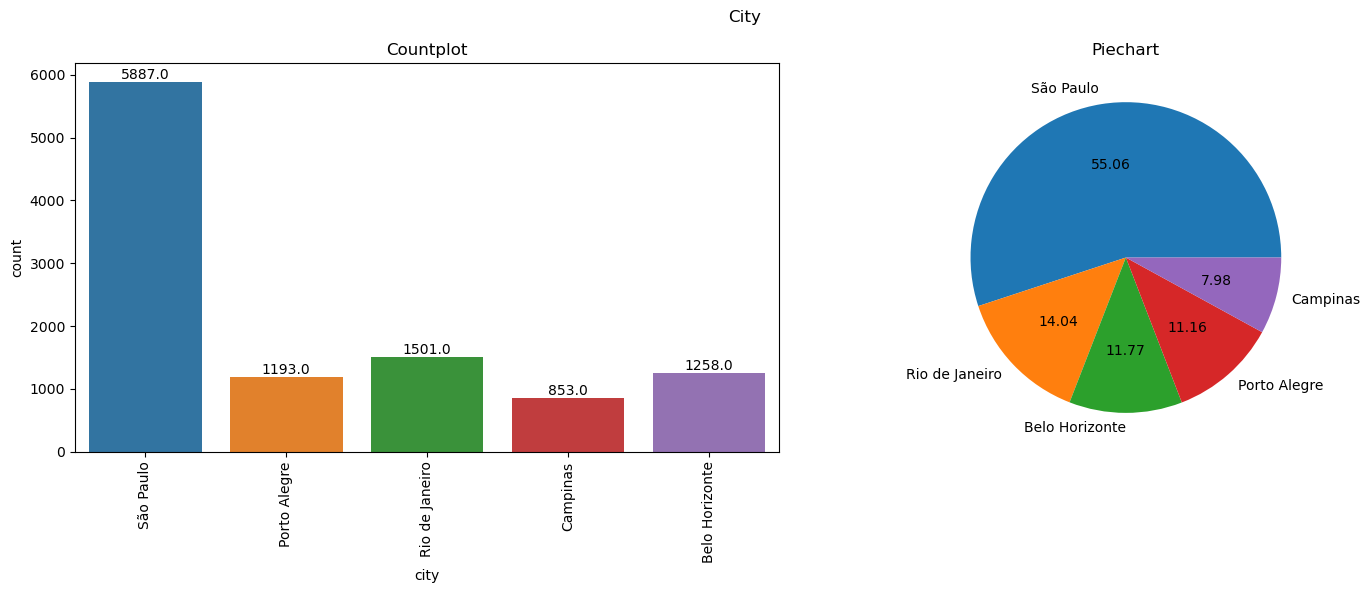

In [13]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
o=cat['city'].value_counts().index
q=cat['city'].value_counts().values
ax[1].pie(x=q,labels=o,autopct='%.2f')
sb.countplot(x=cat['city'],ax=ax[0])
for bar in ax[0].patches:
    count=f"{bar.get_height()}"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax[0].annotate(count,(x,y),va='bottom',ha='center')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_title('Countplot')
ax[1].set_title('Piechart')
plt.suptitle("City")
plt.tight_layout()
plt.show()

# SAO PAULO HAVE LOT OF HOUSES .NEAR BY 70 PERCENTAGE OF HOUSES HAVE IN SAO PAULO AND RIO DE JANERIO. REMAINING 30% ONLY IN REMAINING CITY

# 2. ROOM

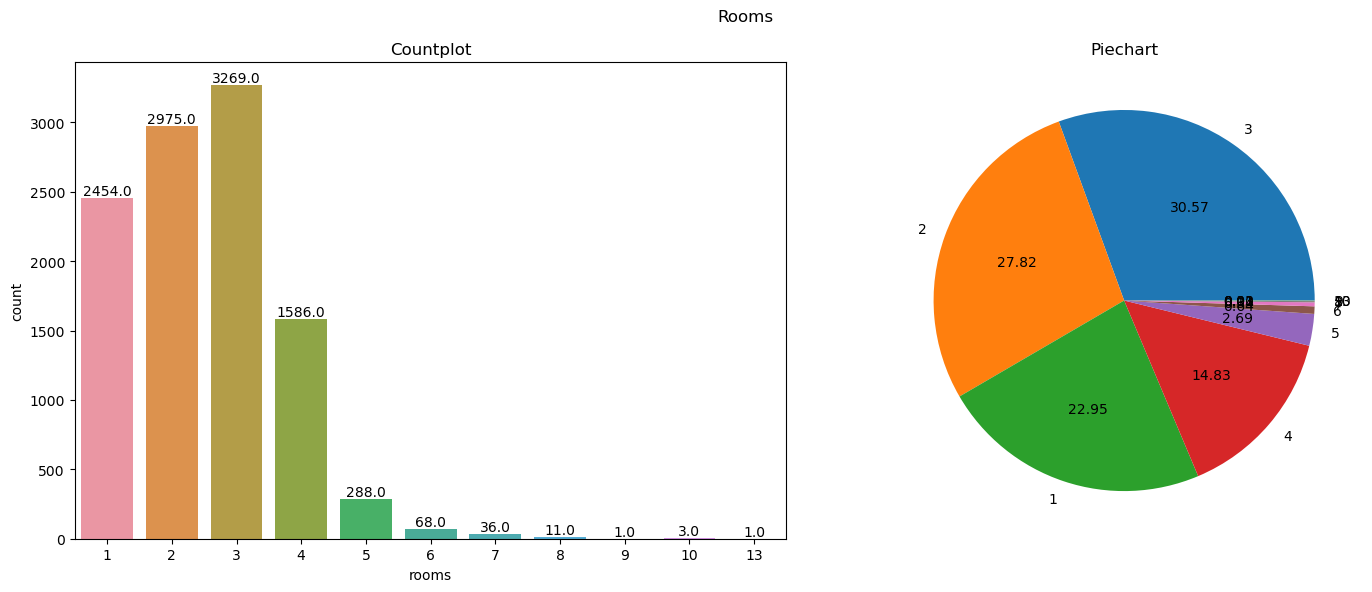

In [14]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
o=cat['rooms'].value_counts().index
q=cat['rooms'].value_counts().values
ax[1].pie(x=q,labels=o,autopct='%.2f')
sb.countplot(x=cat['rooms'],ax=ax[0])
for bar in ax[0].patches:
    count=f"{bar.get_height()}"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax[0].annotate(count,(x,y),va='bottom',ha='center')
ax[0].set_title('Countplot')
ax[1].set_title('Piechart')
plt.suptitle("Rooms")
plt.tight_layout()
plt.show()


# 2 AND 3 ROOMS ARE AVAILABLE NEAR BY 58 PERCENTAGE 

# 3. BATHROOM

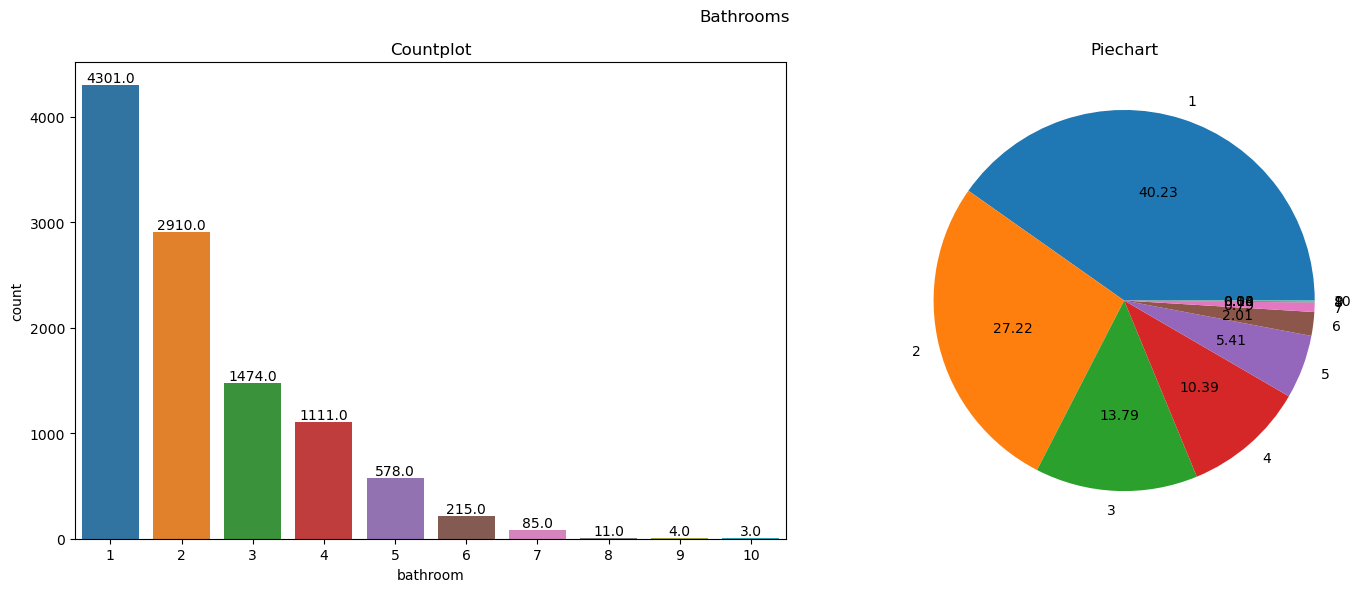

In [15]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
sb.countplot(x=cat['bathroom'],ax=ax[0])
for bar in ax[0].patches:
    count=f"{bar.get_height()}"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax[0].annotate(count,(x,y),va='bottom',ha='center')
o=cat['bathroom'].value_counts().index
q=cat['bathroom'].value_counts().values
ax[1].pie(x=q,labels=o,autopct='%.2f')
ax[0].set_title('Countplot')
ax[1].set_title('Piechart')
plt.suptitle("Bathrooms")
plt.tight_layout()
plt.show()

# 1 AND 2 BATHROOM ENOUGH FOR FAMILY IT NEARLY 70%. 

# 4.PARKING SPACES

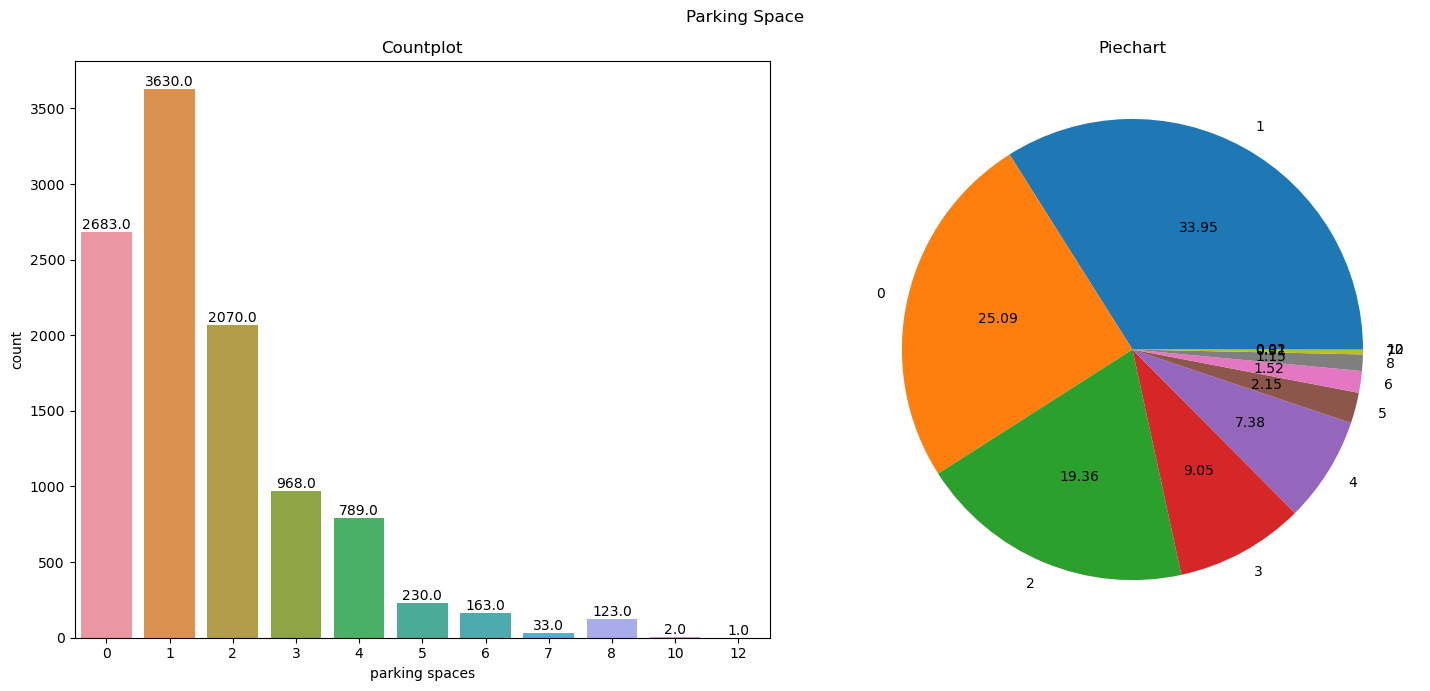

In [16]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sb.countplot(x=cat['parking spaces'],ax=ax[0])
for bar in ax[0].patches:
    count=f"{bar.get_height()}"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax[0].annotate(count,(x,y),va='bottom',ha='center')
o=cat['parking spaces'].value_counts().index
q=cat['parking spaces'].value_counts().values
ax[1].pie(x=q,labels=o,autopct='%.2f')
ax[0].set_title('Countplot')
ax[1].set_title('Piechart')
plt.suptitle("Parking Space")
plt.tight_layout()
plt.show()

# IF SOMEONE HAVE CAR THEY GO WITH 1 PARKING.IF NOT HAVE THE CAR NO NEED FOR PARKING .

# 5. FLOOR

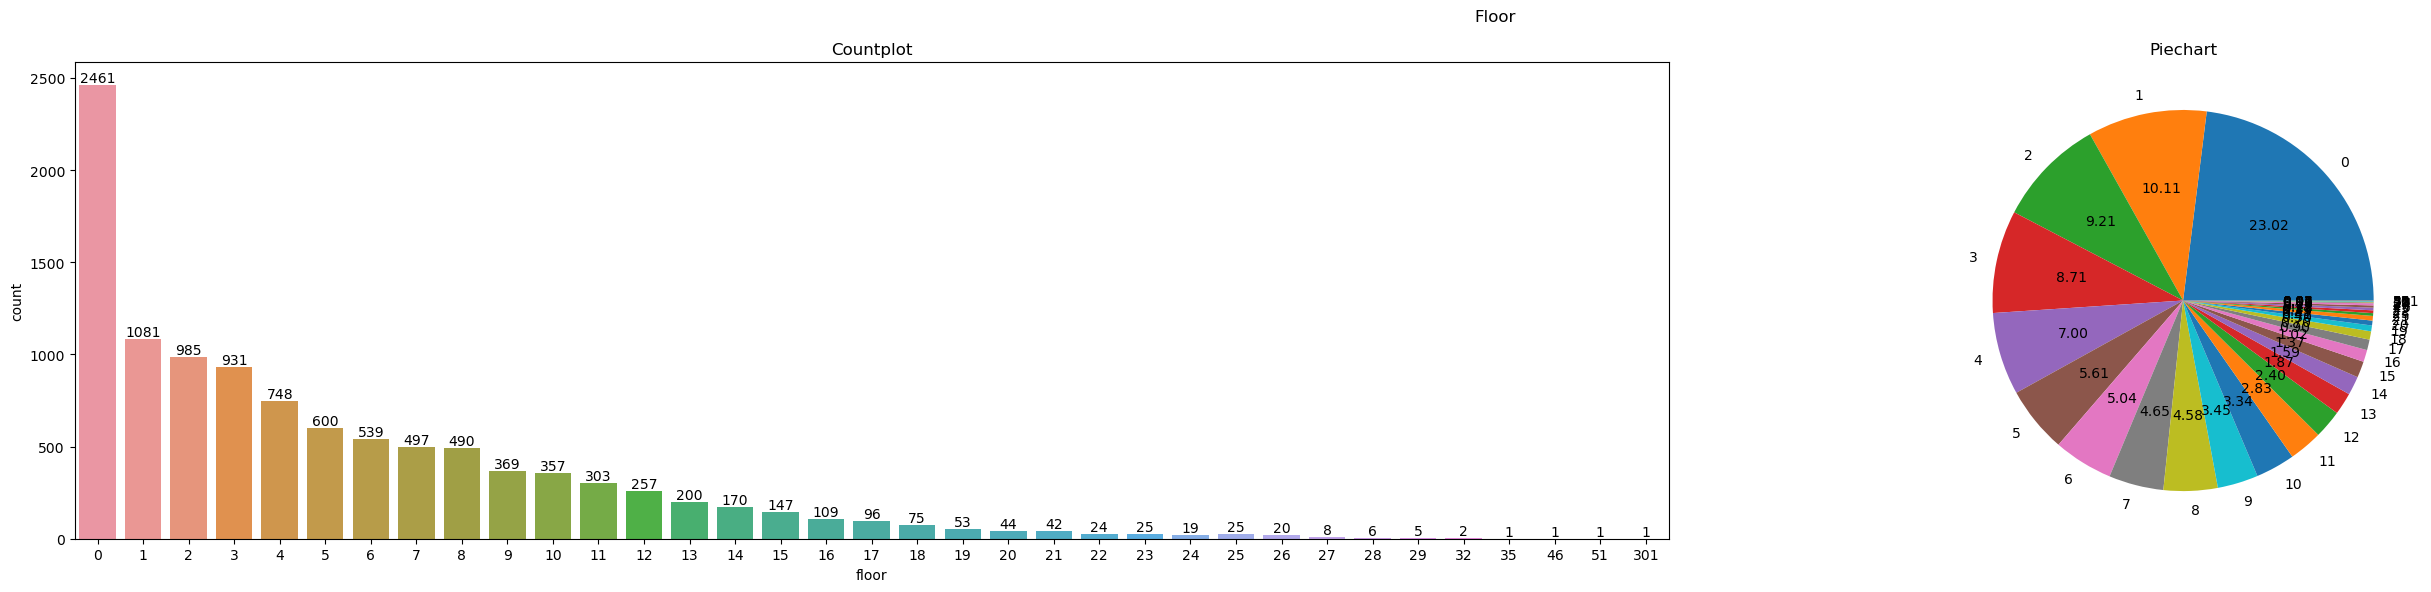

In [17]:
fig,ax=plt.subplots(1,2,figsize=(30,6))
sb.countplot(x=cat['floor'],ax=ax[0])
for bar in ax[0].patches:
    count=f"{round(bar.get_height())}"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax[0].annotate(count,(x,y),va='bottom',ha='center')
o=cat['floor'].value_counts().index
q=cat['floor'].value_counts().values
ax[1].pie(x=q,labels=o,autopct='%.2f')
ax[0].set_title('Countplot')
ax[1].set_title('Piechart')
plt.suptitle("Floor")
plt.tight_layout()
plt.show()

# MOST OF HOUSE HAVE GROUND FLOOR . LOST OF HOUSES COMES UNDER 0 AND 1ST FLOOR

# 6. ANIMAL

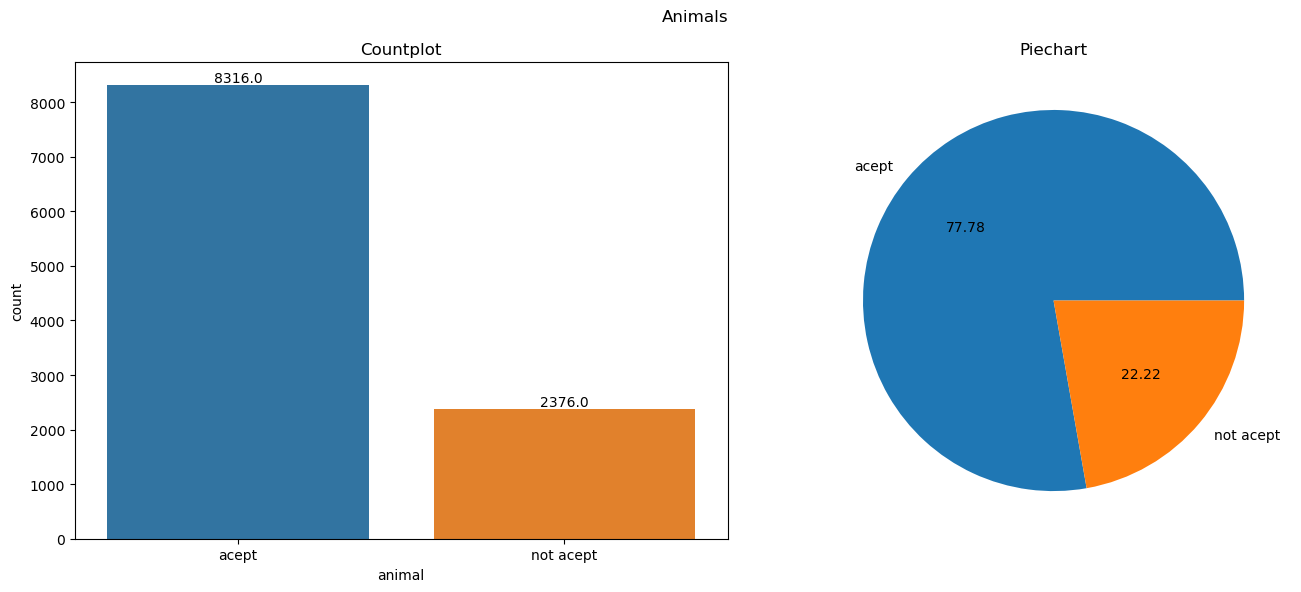

In [18]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
sb.countplot(x=cat['animal'],ax=ax[0])
for bar in ax[0].patches:
    count=f"{bar.get_height()}"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax[0].annotate(count,(x,y),va='bottom',ha='center')
o=cat['animal'].value_counts().index
q=cat['animal'].value_counts().values
ax[1].pie(x=q,labels=o,autopct='%.2f')
ax[0].set_title('Countplot')
ax[1].set_title('Piechart')
plt.suptitle("Animals")
plt.tight_layout()
plt.show()

# 77 % HOUSES ACCEPT THE PETS

# 7. FURNITURE

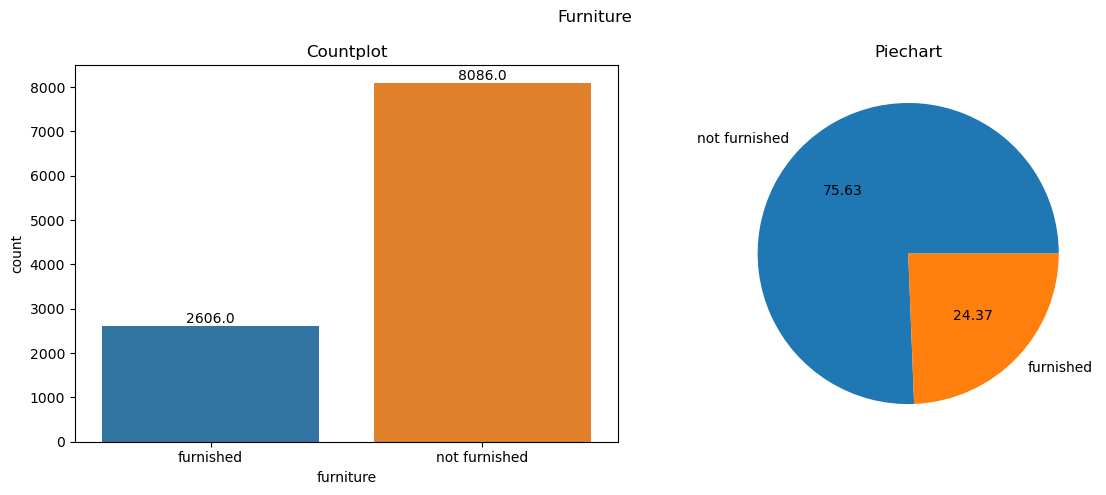

In [19]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sb.countplot(x=cat['furniture'],ax=ax[0])
for bar in ax[0].patches:
    count=f"{bar.get_height()}"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax[0].annotate(count,(x,y),va='bottom',ha='center')
o=cat['furniture'].value_counts().index
q=cat['furniture'].value_counts().values
ax[1].pie(x=q,labels=o,autopct='%.2f')
ax[0].set_title('Countplot')
ax[1].set_title('Piechart')
plt.suptitle("Furniture")
plt.tight_layout()
plt.show()

# 24 % HOUSES ONLY FURNISHED

# LEVEL 1 ANALYSIS FOR NUMERICAL COLUMNS
*  FIRST WE CHECK THE NULL VALUES OF EACH COLUMNS
*  IF WE FIND ANY NULL VALUES WE HAVE TO DO MISSING VALUES TREATMENT.
*  UNIQUE VALUES OF EACH COLUMNS

In [20]:
num.columns

Index(['area', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)',
       'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [21]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   area                 10692 non-null  int64
 1   hoa (R$)             10692 non-null  int64
 2   rent amount (R$)     10692 non-null  int64
 3   property tax (R$)    10692 non-null  int64
 4   fire insurance (R$)  10692 non-null  int64
 5   total (R$)           10692 non-null  int64
dtypes: int64(6)
memory usage: 501.3 KB


In [22]:
for i in num.columns:
    if num[i].isnull().sum()>0:
        num[i]=num[i].mean()
    print(f"{i}   MISSING VALUE   {num[i].isnull().sum()}")
    print(f"{i}   MEAN VALUE   {num[i].mean()}")    
    print(f"{i}   MEDIAN VALUE   {num[i].median()}")       
    print(f"{i}   NO.UNIQUE VALUE   {num[i].nunique()}")        

area   MISSING VALUE   0
area   MEAN VALUE   149.21791994014217
area   MEDIAN VALUE   90.0
area   NO.UNIQUE VALUE   517
hoa (R$)   MISSING VALUE   0
hoa (R$)   MEAN VALUE   1174.0216984661429
hoa (R$)   MEDIAN VALUE   560.0
hoa (R$)   NO.UNIQUE VALUE   1679
rent amount (R$)   MISSING VALUE   0
rent amount (R$)   MEAN VALUE   3896.247194163861
rent amount (R$)   MEDIAN VALUE   2661.0
rent amount (R$)   NO.UNIQUE VALUE   1195
property tax (R$)   MISSING VALUE   0
property tax (R$)   MEAN VALUE   366.70435839880287
property tax (R$)   MEDIAN VALUE   125.0
property tax (R$)   NO.UNIQUE VALUE   1243
fire insurance (R$)   MISSING VALUE   0
fire insurance (R$)   MEAN VALUE   53.300879161990274
fire insurance (R$)   MEDIAN VALUE   36.0
fire insurance (R$)   NO.UNIQUE VALUE   216
total (R$)   MISSING VALUE   0
total (R$)   MEAN VALUE   5490.4869996258885
total (R$)   MEDIAN VALUE   3581.5
total (R$)   NO.UNIQUE VALUE   5751


# 8.AREA

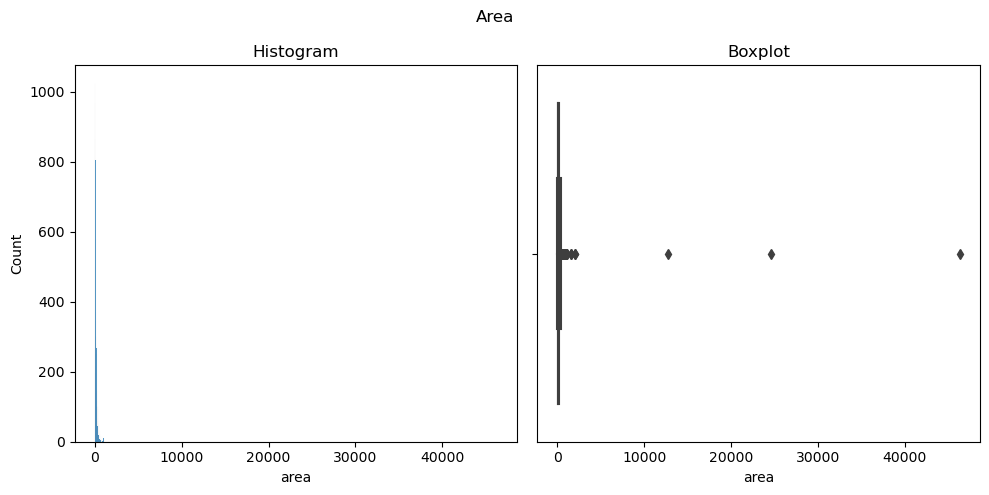

In [23]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=num['area'],ax=ax[0])
sb.boxplot(x=num['area'],ax=ax[1])
ax[0].set_title('Histogram')
ax[1].set_title('Boxplot')
plt.suptitle("Area")
plt.tight_layout()
plt.show()

In [24]:
mean= num['area'].mean()
s=num[num['area']>500].index
for index in s:
    num.loc[index,'area']=mean

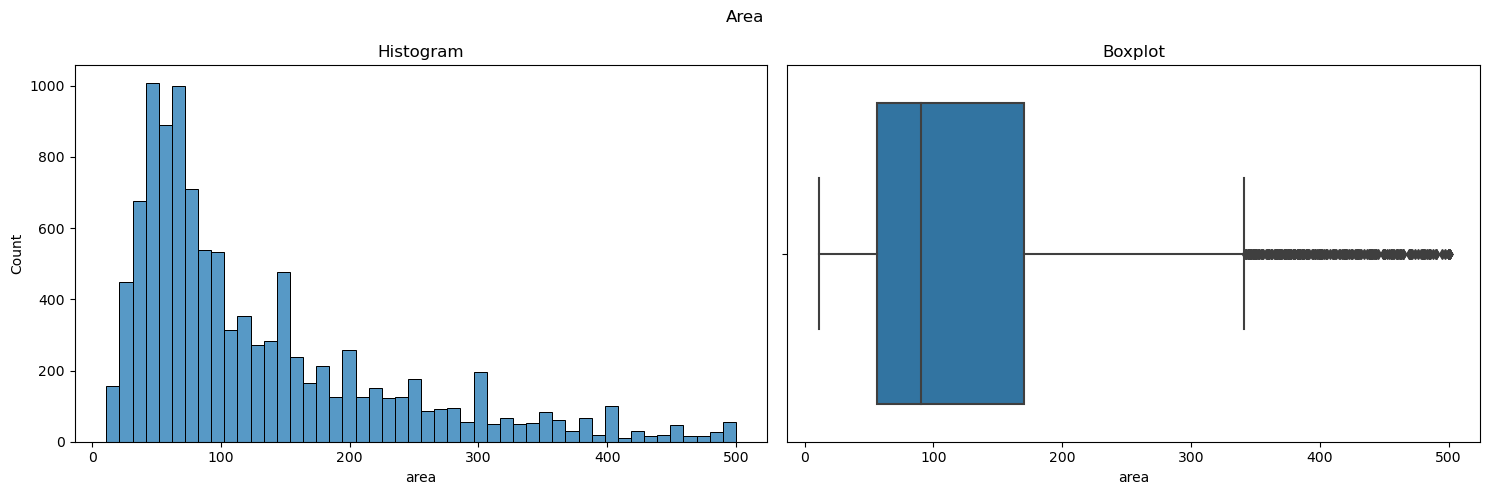

In [25]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sb.histplot(x=num['area'],ax=ax[0])
sb.boxplot(x=num['area'],ax=ax[1])
ax[0].set_title('Histogram')
ax[1].set_title('Boxplot')
plt.suptitle("Area")
plt.tight_layout()
plt.show()

# LOT OF HOUSES COMES FROM AREA FROM 70 TO 200

# 9. hoa (R$)

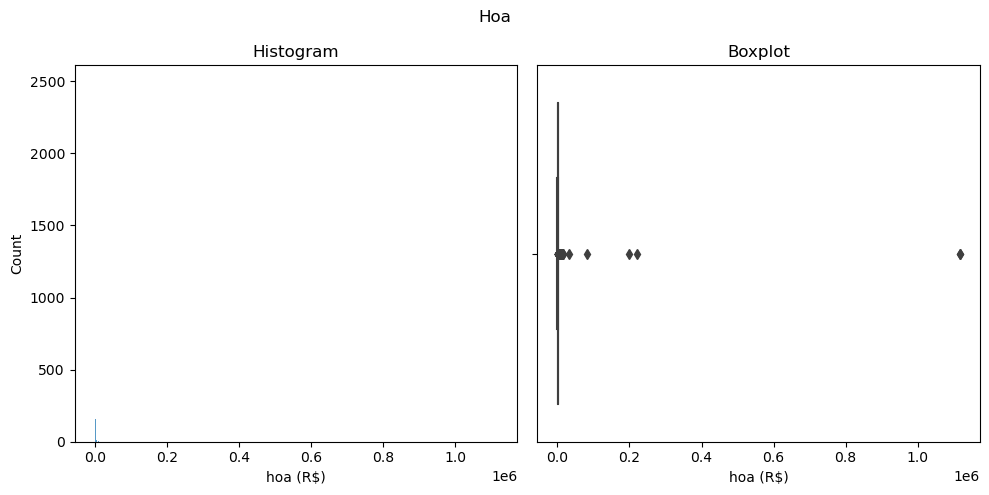

In [26]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=num['hoa (R$)'],ax=ax[0])
sb.boxplot(x=num['hoa (R$)'],ax=ax[1])
ax[0].set_title('Histogram')
ax[1].set_title('Boxplot')
plt.suptitle("Hoa")
plt.tight_layout()
plt.show()

In [27]:
mean= int(num['hoa (R$)'].mean())
s=num[num['hoa (R$)']>2000].index
for index in s:
    num.loc[index,'hoa (R$)']=mean

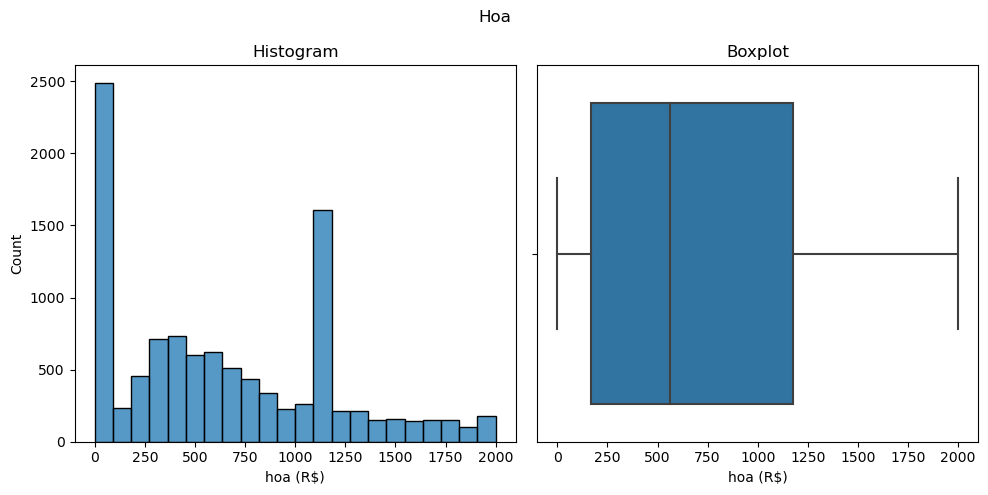

In [28]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=num['hoa (R$)'],ax=ax[0])
sb.boxplot(x=num['hoa (R$)'],ax=ax[1])
ax[0].set_title('Histogram')
ax[1].set_title('Boxplot')
plt.suptitle("Hoa")
plt.tight_layout()
plt.show()

# AVERAGE HOA RANGE IS 0 TO 500

#  10.RENT AMOUNT

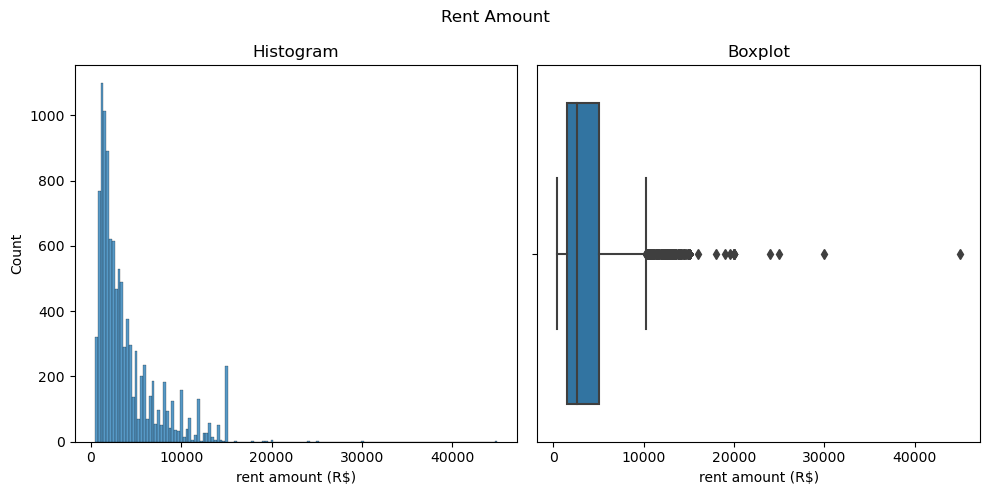

In [29]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=num['rent amount (R$)'],ax=ax[0])
sb.boxplot(x=num['rent amount (R$)'],ax=ax[1])
ax[0].set_title('Histogram')
ax[1].set_title('Boxplot')
plt.suptitle("Rent Amount")
plt.tight_layout()
plt.show()

In [30]:
mean= int(num['rent amount (R$)'].mean())
s=num[num['rent amount (R$)']>10000].index
for index in s:
    num.loc[index,'rent amount (R$)']=mean

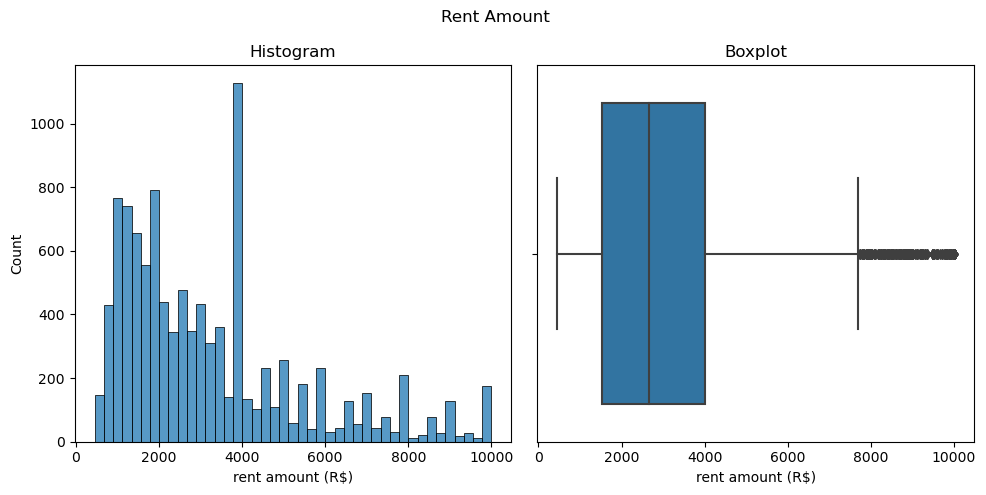

In [31]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=num['rent amount (R$)'],ax=ax[0])
sb.boxplot(x=num['rent amount (R$)'],ax=ax[1])
ax[0].set_title('Histogram')
ax[1].set_title('Boxplot')
plt.suptitle("Rent Amount")
plt.tight_layout()
plt.show()

# LOT OF HOUSES RENT FROM 1000 TO 4000

# 11. PROPERTY TAX

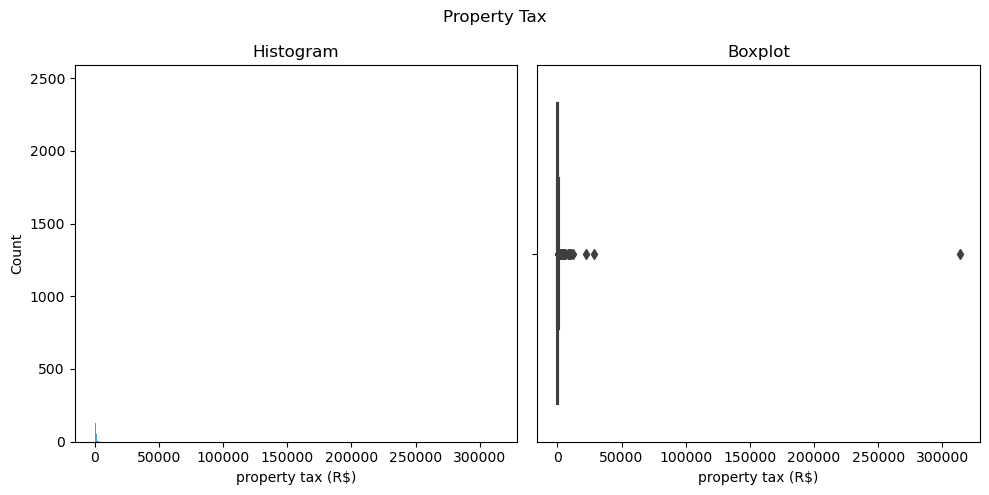

In [32]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=num['property tax (R$)'],ax=ax[0])
sb.boxplot(x=num['property tax (R$)'],ax=ax[1])
ax[0].set_title('Histogram')
ax[1].set_title('Boxplot')
plt.suptitle("Property Tax")
plt.tight_layout()
plt.show()

In [33]:
mean= int(num['property tax (R$)'].mean())
s=num[num['property tax (R$)']>2000].index
for index in s:
    num.loc[index,'property tax (R$)']=mean

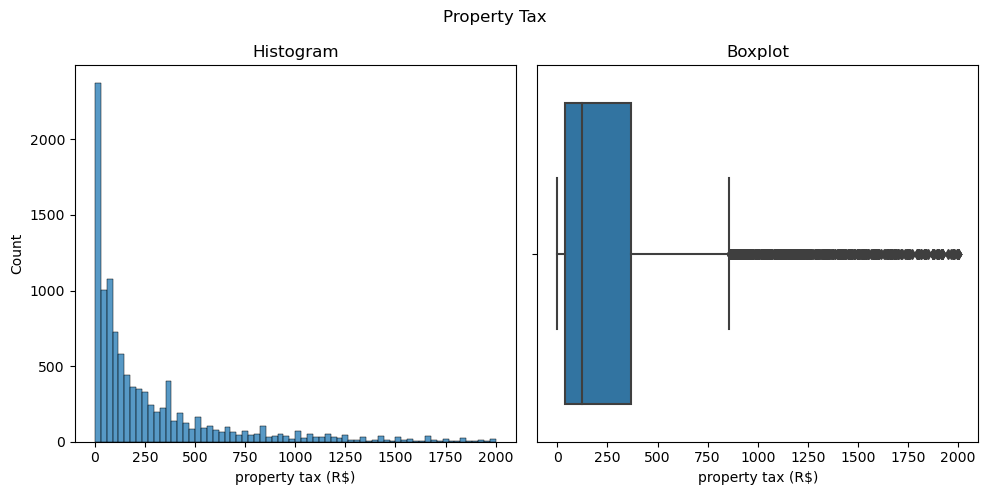

In [34]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=num['property tax (R$)'],ax=ax[0])
sb.boxplot(x=num['property tax (R$)'],ax=ax[1])
ax[0].set_title('Histogram')
ax[1].set_title('Boxplot')
plt.suptitle("Property Tax")
plt.tight_layout()
plt.show()

# LOT OF HOUSE PROPERTY TAX  PRICE HAVE 0 TO 500

# 12. FIRE INSURANCE

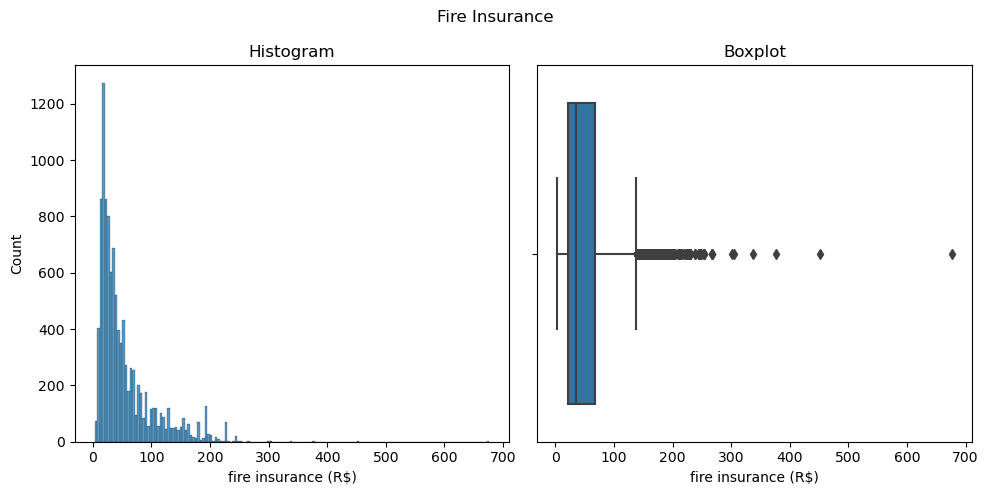

In [35]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=num['fire insurance (R$)'],ax=ax[0])
sb.boxplot(x=num['fire insurance (R$)'],ax=ax[1])
ax[0].set_title('Histogram')
ax[1].set_title('Boxplot')
plt.suptitle("Fire Insurance")
plt.tight_layout()
plt.show()

In [36]:
mean= int(num['fire insurance (R$)'].mean())
s=num[num['fire insurance (R$)']>300].index
for index in s:
    num.loc[index,'fire insurance (R$)']=mean

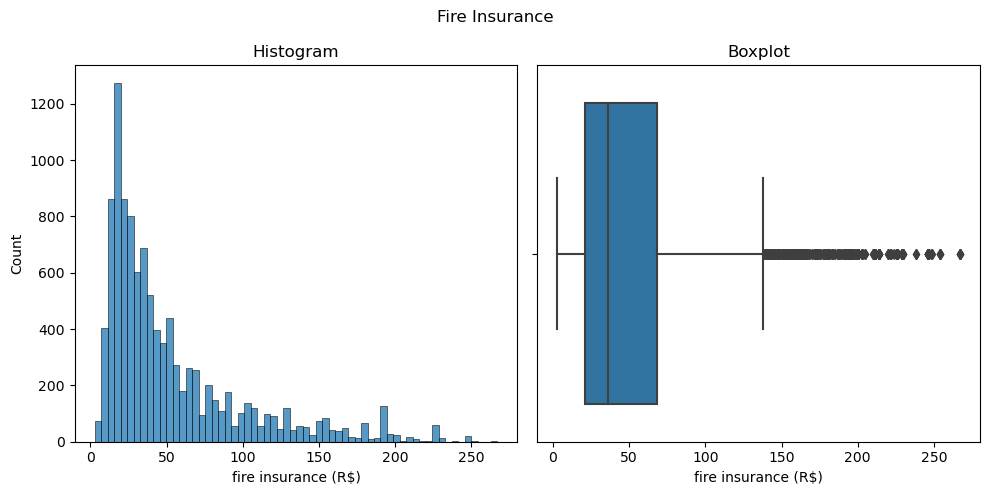

In [37]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=num['fire insurance (R$)'],ax=ax[0])
sb.boxplot(x=num['fire insurance (R$)'],ax=ax[1])
ax[0].set_title('Histogram')
ax[1].set_title('Boxplot')
plt.suptitle("Fire Insurance")
plt.tight_layout()
plt.show()

# LOT OF HOUSE HAVE  FIRE INSURANCE RANGE 20 TO 50

# 13. TOTAL

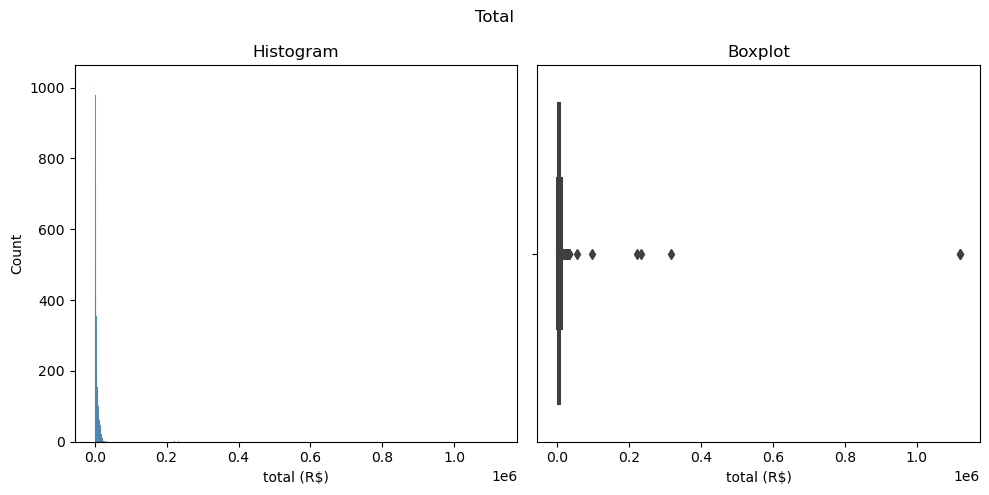

In [38]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=num['total (R$)'],ax=ax[0])
sb.boxplot(x=num['total (R$)'],ax=ax[1])
ax[0].set_title('Histogram')
ax[1].set_title('Boxplot')
plt.suptitle("Total")
plt.tight_layout()
plt.show()

In [39]:
mean= int(num['total (R$)'].mean())
s=num[num['total (R$)']>10500].index
for index in s:
    num.loc[index,'total (R$)']=mean

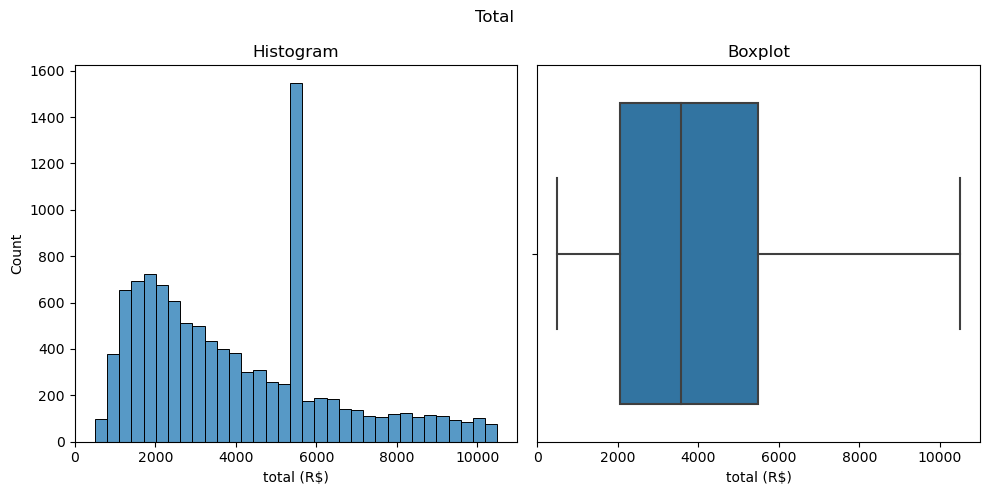

In [40]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=num['total (R$)'],ax=ax[0])
sb.boxplot(x=num['total (R$)'],ax=ax[1])
ax[0].set_title('Histogram')
ax[1].set_title('Boxplot')
plt.suptitle("Total")
plt.tight_layout()
plt.show()

# AVERAGE TOTAL PRICE BETWEEN 2000 TO 6000

# ANALYSIS 2 
* BIVARIATE ANALYSIS

In [41]:
work1=work[(work['city']=='Campinas')|(work['city']=='Porto Alegre')|(work['city']=='Belo Horizonte')]
work1

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
15,Campinas,330,4,6,6,0,acept,furnished,680,8000,328,121,9129
21,Belo Horizonte,42,1,1,1,17,not acept,furnished,470,2690,172,36,3368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10667,Belo Horizonte,75,2,1,1,3,not acept,not furnished,180,1250,0,17,1447
10673,Porto Alegre,220,3,2,2,15,acept,not furnished,842,2400,117,36,3395
10676,Porto Alegre,40,1,1,0,1,acept,not furnished,330,1200,159,18,1707
10682,Porto Alegre,160,3,2,3,4,acept,furnished,850,3300,220,49,4419


In [42]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            10692 non-null  object
 1   rooms           10692 non-null  int64 
 2   bathroom        10692 non-null  int64 
 3   parking spaces  10692 non-null  int64 
 4   floor           10692 non-null  int64 
 5   animal          10692 non-null  object
 6   furniture       10692 non-null  object
dtypes: int64(4), object(3)
memory usage: 584.8+ KB


In [43]:
def cb(ax,count='number of rows'):
    for bar in ax.patches:
        count=f"{round(bar.get_height())}"
        x=bar.get_x()+bar.get_width()/2
        y=bar.get_height()
        ax.annotate(count,(x,y),va='bottom',ha='center')


# CITY VS
           *ROOMS 
           *BATHROOMS

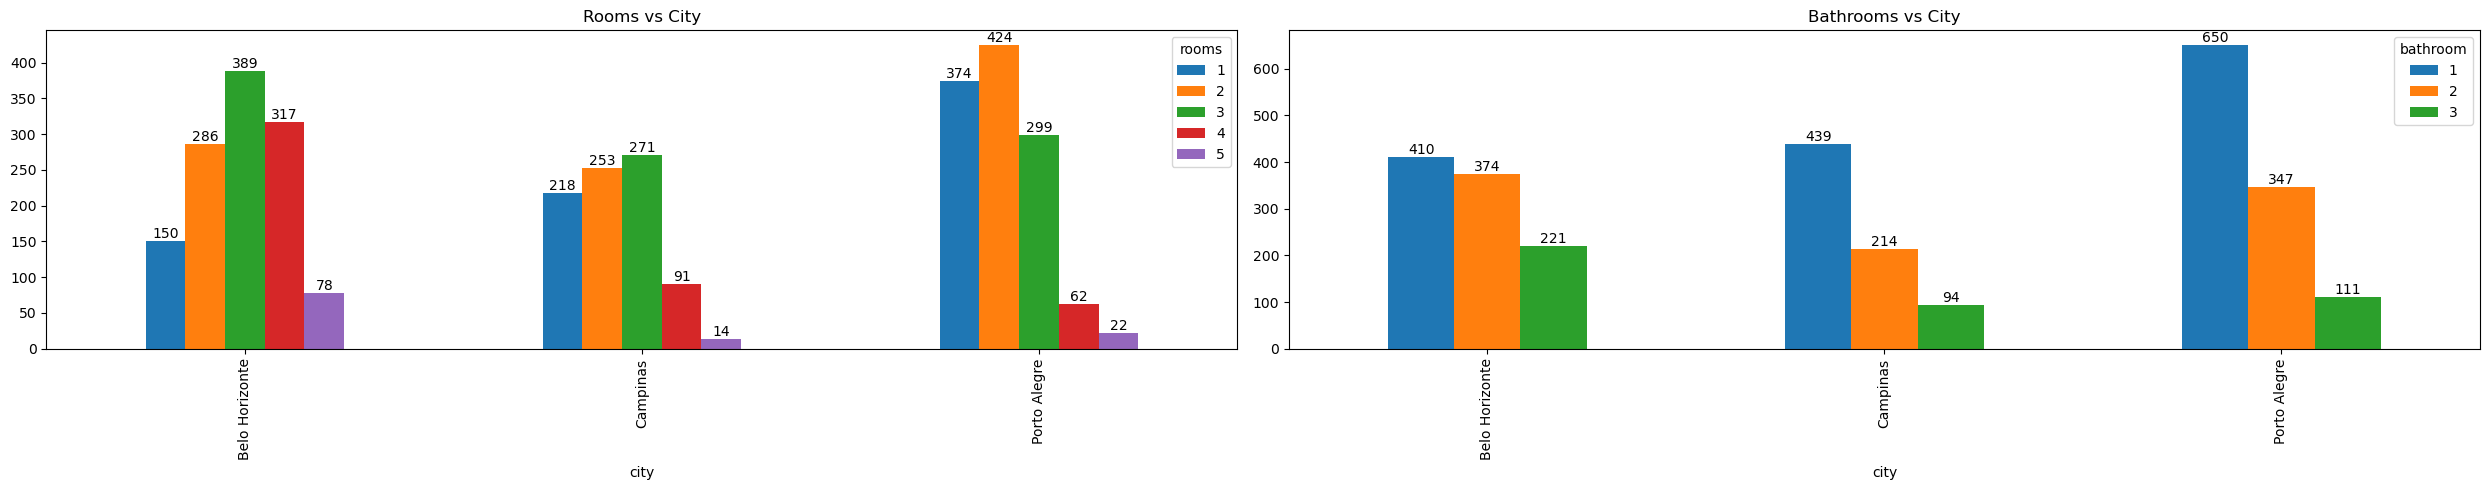

In [44]:
r=work1[work1['rooms']<=5]
b=work1[work1['bathroom']<=3]
fig,ax=plt.subplots(1,2,figsize=(25,5))
pd.crosstab(index=r['city'],columns=r['rooms']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=b['city'],columns=b['bathroom']).plot(kind='bar',ax=ax[1])
cb(ax[0],r)
cb(ax[1],b)
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
ax[1].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
ax[0].set_title('Rooms vs City')
ax[1].set_title('Bathrooms vs City')
plt.tight_layout()
plt.show()

#
* 1 AND 2 ROOMS AVAILABLE IN PORTO ALEGRE .3,4 and 5 ROOMS AVAILABLE IN BELO HORIZONTE
*  WE WANT LOWER PRICE SO  1 BATHROOMS AVAILABLE IN PORTO ALEGRE AND 2 AND 3 AVAILABLE IN BELO HORIZONTE

# CITY VS 
            *  PARKING SPACES
            *  FLOOR

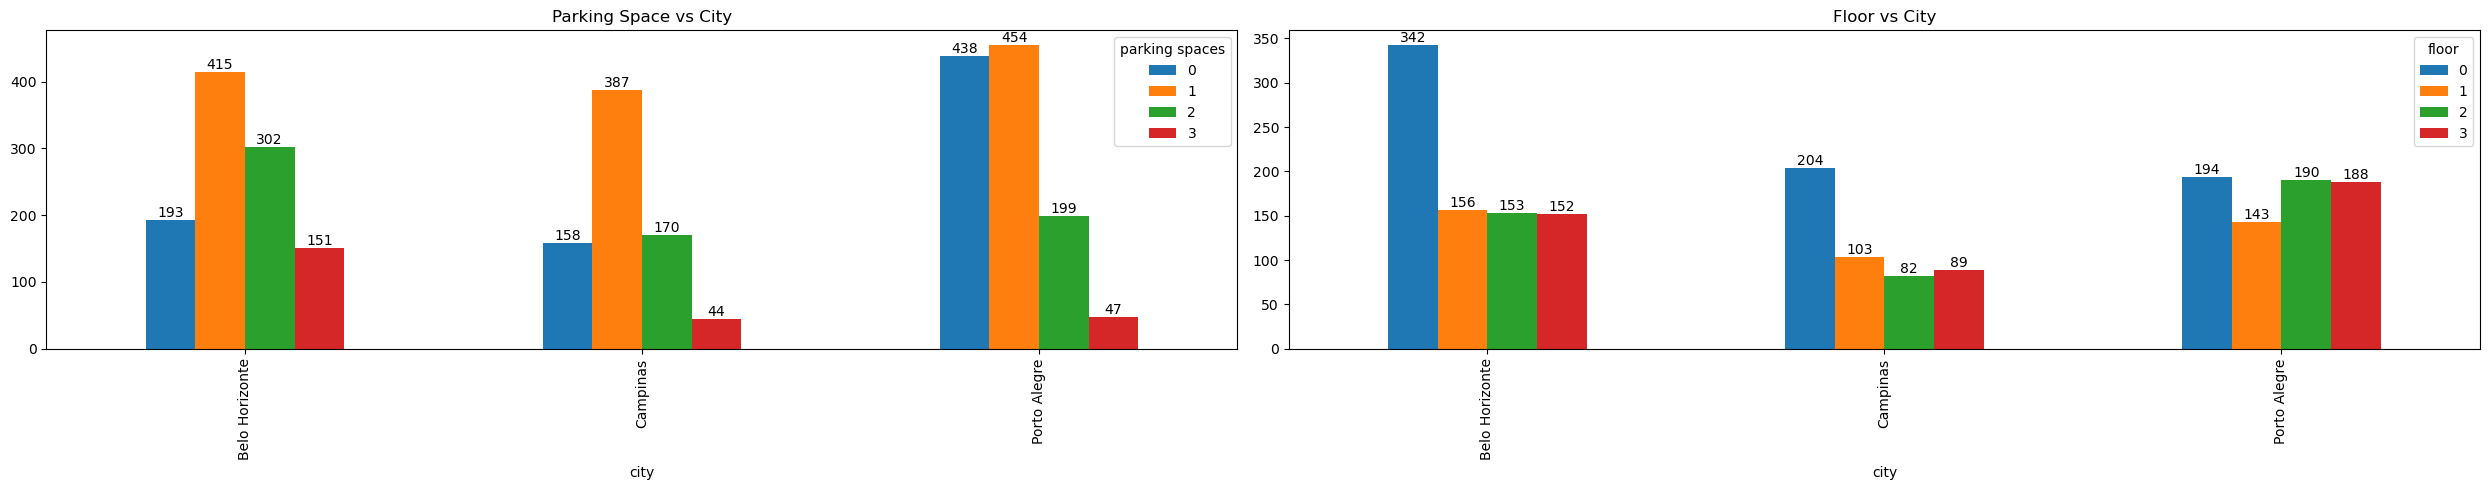

In [45]:
p=work1[work1['parking spaces']<=3]
f=work1[work1['floor']<=3]
fig,ax=plt.subplots(1,2,figsize=(25,5))
pd.crosstab(index=p['city'],columns=p['parking spaces']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=f['city'],columns=f['floor']).plot(kind='bar',ax=ax[1])
cb(ax[0],p)
cb(ax[1],p)
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
ax[1].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
ax[0].set_title('Parking Space vs City')
ax[1].set_title('Floor vs City')
plt.tight_layout()
plt.show()

# 
* 1 and 2 PARKING SPACE ENOUGH IN PORTO ALGEGRE. 3 and 4 FOR BELO HORIZONTE
* 1 and 2 FLOOR ENOUGH IN BELO HORIZONTE. 3 and 4 FOR PORTO ALGEGRE

# FURNITURE VS
            * ROOMS
            * FLOOR

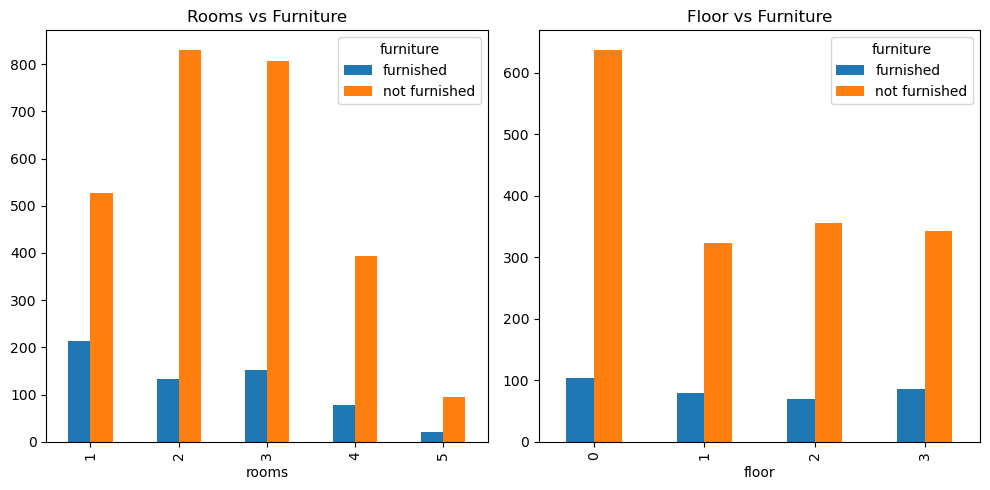

In [46]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
pd.crosstab(index=r['rooms'],columns=r['furniture']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=f['floor'],columns=f['furniture']).plot(kind='bar',ax=ax[1])
ax[0].set_title('Rooms vs Furniture')
ax[1].set_title('Floor vs Furniture')
plt.tight_layout()
plt.show()

#
* LOT OF 1 AND 3 ROOMS HOUSES ARE FURNISHED
* LOT OF 1 FLOOR HAS BEEN FURNISHED

# CITY VS
        * ANIMAL
        * FURNITURE

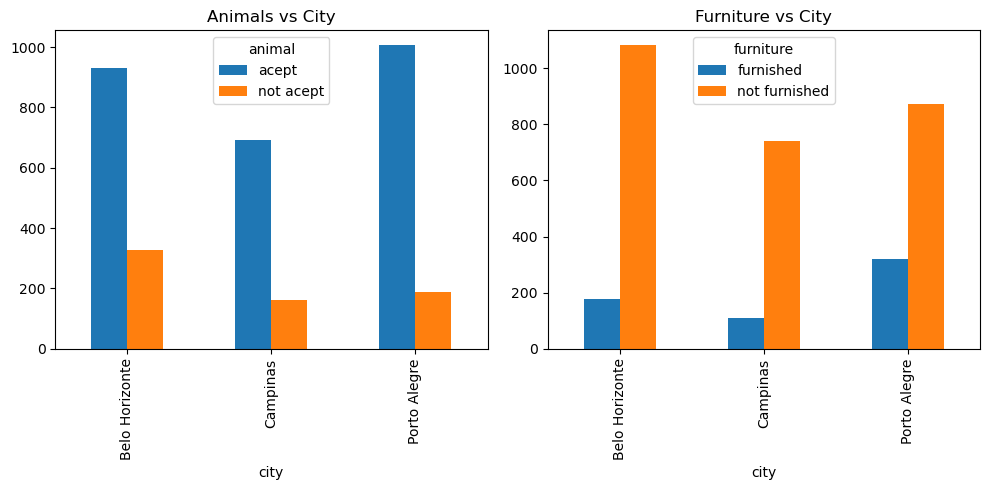

In [47]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
pd.crosstab(index=work1['city'],columns=work1['animal']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=work1['city'],columns=work1['furniture']).plot(kind='bar',ax=ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
ax[1].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
ax[0].set_title('Animals vs City')
ax[1].set_title('Furniture vs City')
plt.tight_layout()
plt.show()

#
* IN  PORTO ALEGRE AND BELO HORIZONTE ARE ACCEPT THE PETS.
* IN  PORTO ALEGRE AND BELO HORIZONTE ARE FURNISHED.

# PARKING VS FURNISHED
# ANIMAL VS BATHROOM

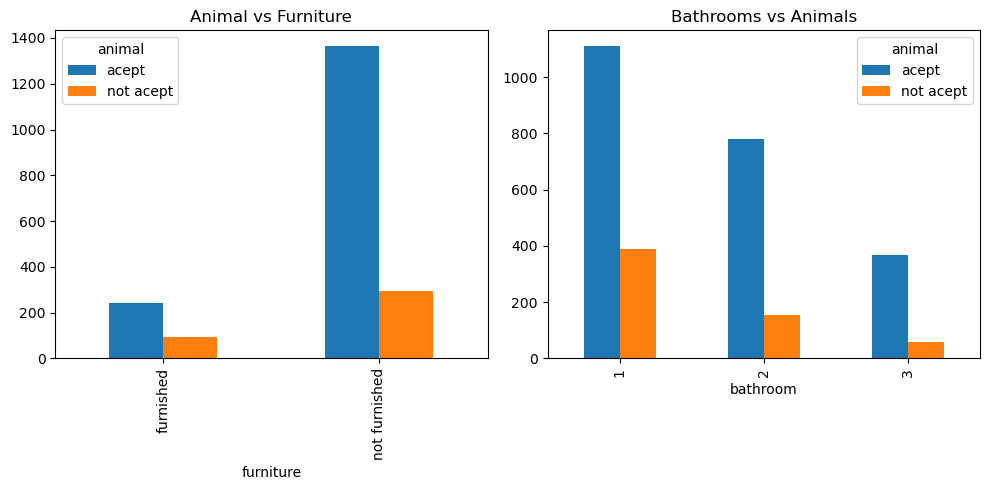

In [48]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
pd.crosstab(index=f['furniture'],columns=f['animal']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=b['bathroom'],columns=b['animal']).plot(kind='bar',ax=ax[1])
ax[0].set_title('Animal vs Furniture')
ax[1].set_title('Bathrooms vs Animals')
plt.tight_layout()
plt.show()

#
* LESS AMOUNT OF HOUSES WITH PURNISHED AND PET ACCEPTED.
* 1 AND BATHROOM ARE ACCEPTED THE PETS

# PARKING SPACE VS
                * FLOOR
                * FURNISHED

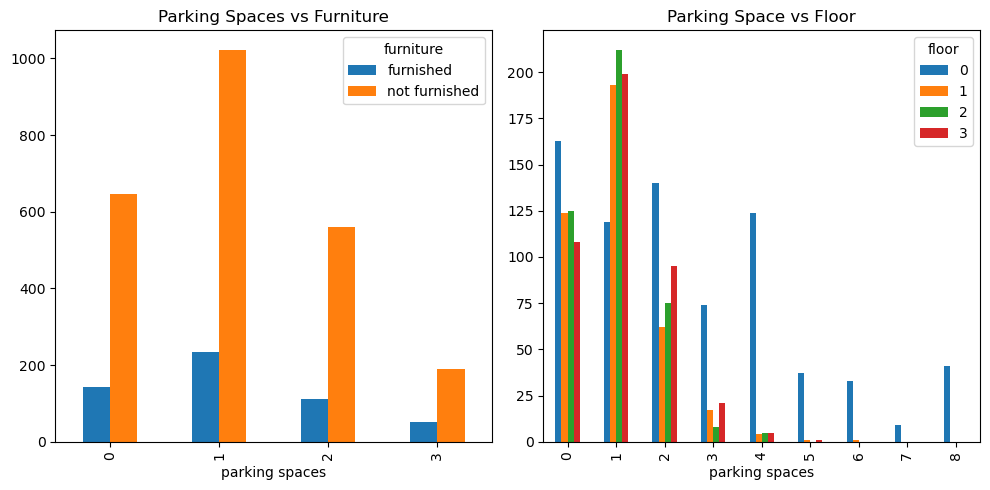

In [49]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
pd.crosstab(index=p['parking spaces'],columns=p['furniture']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=f['parking spaces'],columns=f['floor']).plot(kind='bar',ax=ax[1])
ax[0].set_title('Parking Spaces vs Furniture')
ax[1].set_title('Parking Space vs Floor')
plt.tight_layout()
plt.show()

# 
* 1 PARKING HOUSES ARE FURNISHED. 
* LOT OF 0 AND 1 FLOOR HOUSES ARE FURNISHED.

# FIRE INSURANCE VS RENT
# HOA VS TOTAL

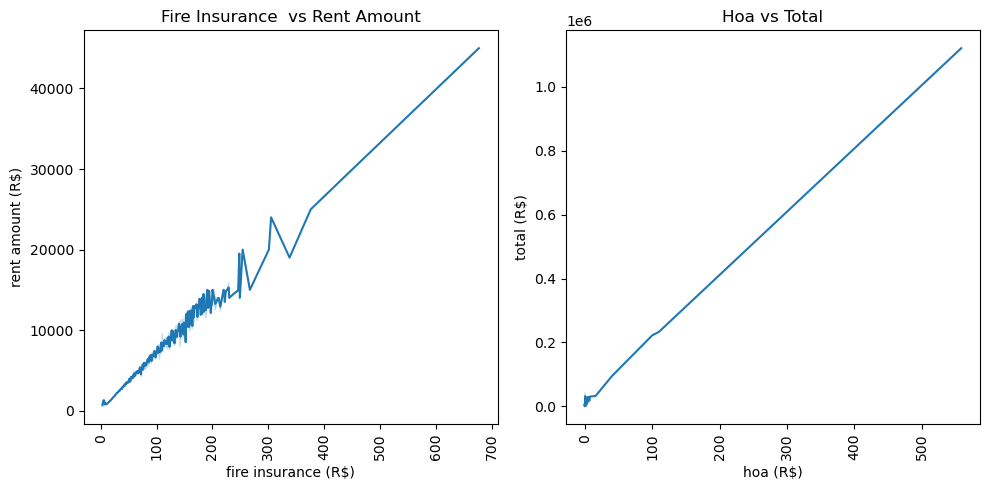

In [50]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.lineplot(x=work['fire insurance (R$)'],y=work['rent amount (R$)'],ax=ax[0])
sb.lineplot(x=work['hoa (R$)'],y=work['total (R$)'],ax=ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
ax[1].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
ax[0].set_title('Fire Insurance  vs Rent Amount')
ax[1].set_title('Hoa vs Total')
plt.tight_layout()
plt.show()

# 
* IF FIRE INSURANCE INCREASE RENT ALSO INCREASE
* IF HOA ALSO INCREASE TOTAL ALSO INCREASE.

# CITY VS TOTAL RENT

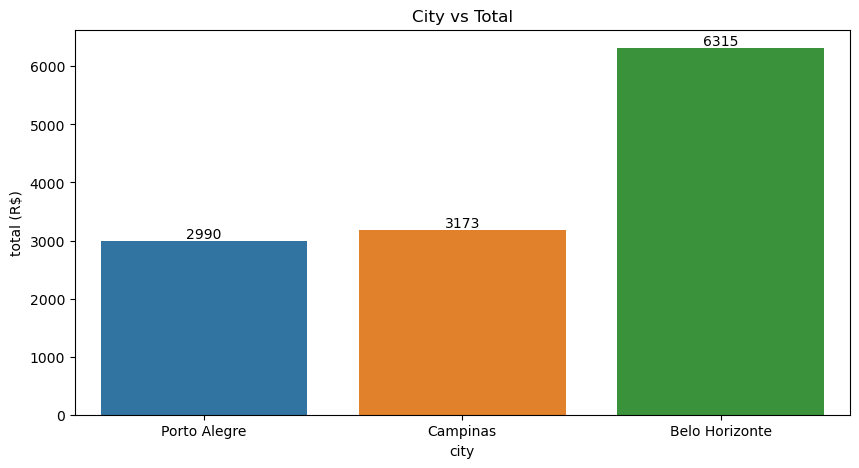

In [51]:
fig,ax=plt.subplots(1,figsize=(10,5))
sb.barplot(data=work,x=work1['city'],y=work1['total (R$)'],ci=False)
cb(ax,work)
plt.title('City vs Total')
plt.show()

# PORTO ALEGRE AND BELO HORRZONTIE HAVE LESS AMOUNT OF AVERAGE RENT 

# LEVEL 3 ANALYSIS 
    * MULTI VARIATE

In [52]:
campinas=work[(work['city']=='Campinas')]
porto=work[(work['city']=='Porto Alegre')]
belo=work[(work['city']=='Belo Horizonte')]

# CITY VS TOTAL RS WITH ROOMS

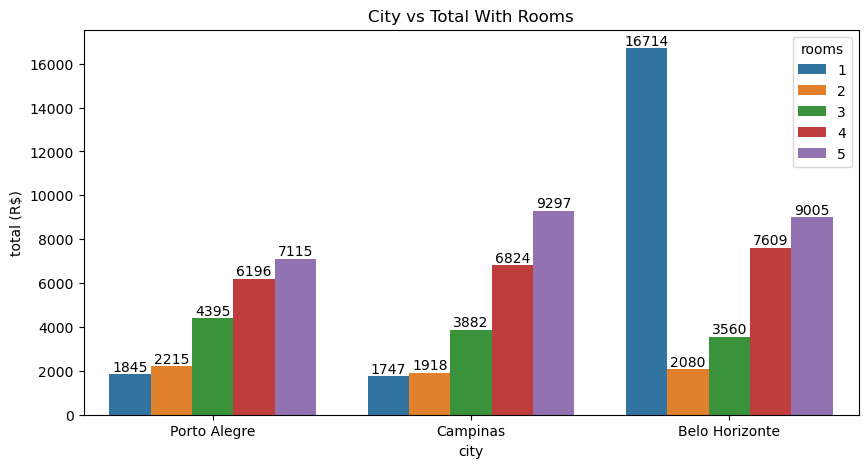

In [53]:
fig,ax=plt.subplots(1,figsize=(10,5))
sb.barplot(data=r,x=r['city'],y=r['total (R$)'],hue=r['rooms'],ci=False)
cb(ax,r)
plt.title('City vs Total With Rooms')
plt.show()

# In Campinas 1,2,3 rooms average total are low and In porto alegre 4 and 5 rooms are less average total.

# CITY VS RENT RS WITH ROOMS

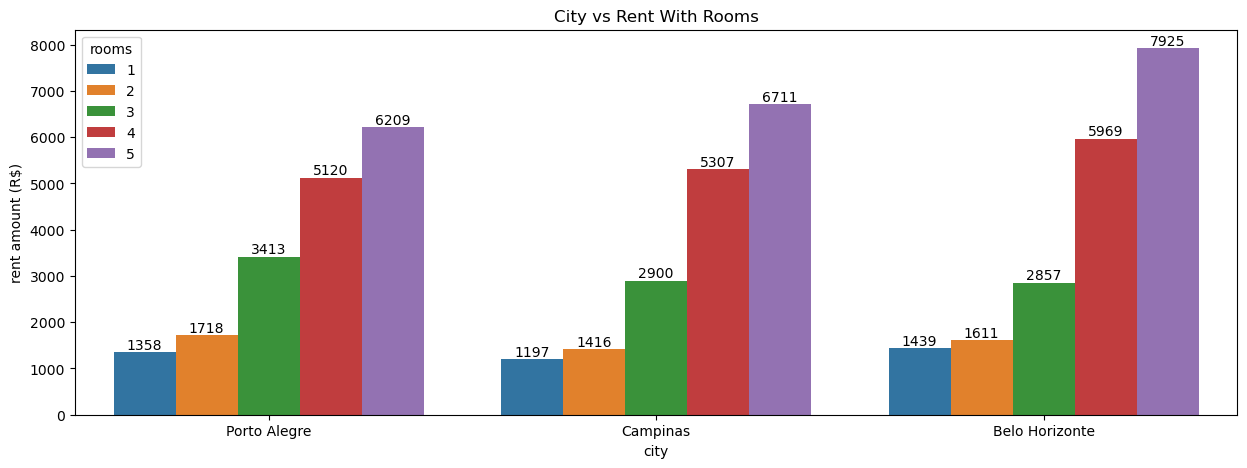

In [54]:
fig,ax=plt.subplots(1,figsize=(15,5))
sb.barplot(data=r,x=r['city'],y=r['rent amount (R$)'],hue=r['rooms'],ci=False)
cb(ax,r)
plt.title('City vs Rent With Rooms')
plt.show()

# In Campinas 1,2,3 rooms average rents are low and In porto alegre 4 and 5 rooms are less average rents.

# CITY VS BATHROOMS WITH TOTAL & RENT

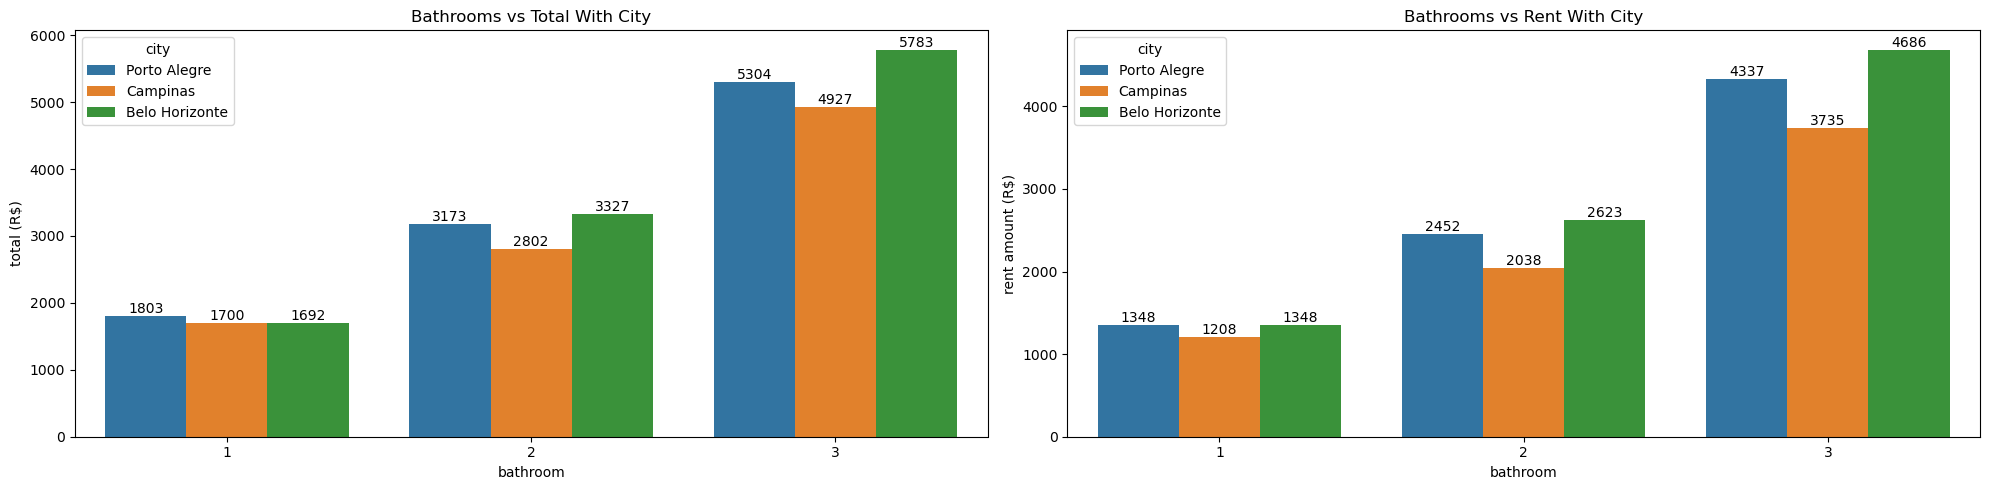

In [55]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
sb.barplot(data=work,x=b['bathroom'],y=b['total (R$)'],hue=b['city'],ci=False,ax=ax[0])
sb.barplot(data=work,x=b['bathroom'],y=b['rent amount (R$)'],hue=b['city'],ci=False,ax=ax[1])
cb(ax[0],r)
cb(ax[1],b)
ax[0].set_title('Bathrooms vs Total With City')
ax[1].set_title('Bathrooms vs Rent With City')
plt.tight_layout()
plt.show()

# Total 
* One Bathroom houses are low Total in Campinas and Belo Horizonte.
* Two Bathroom houses are less total in Campinas.
* Three Bathroom houses are less total in Campinas.
# Rent
* One bathroom Rent low in Campinas.
* Two bathroom Rent low in Campinas.
* Three bathroom Rent low in Campinas.

# BATHROOM VS TOTAL RS WITH ROOMS

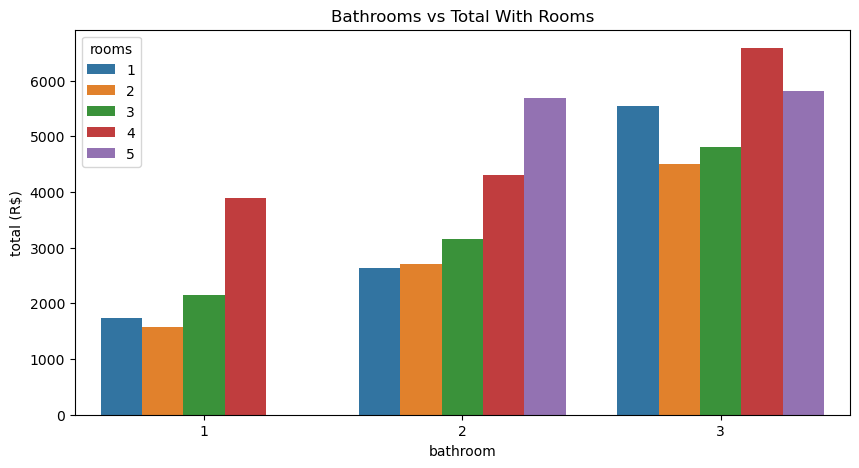

In [56]:
fig,ax=plt.subplots(1,figsize=(10,5))
sb.barplot(data=r,x=b['bathroom'],y=r['total (R$)'],hue=r['rooms'],ci=False)
plt.title('Bathrooms vs Total With Rooms')
plt.show()

# 
* One bathroom and 2 rooms are less average total.
* Two bathroom and 2 rooms are less average total.
* Three bathroom and 3 rooms are less average total.

# BATHROOM VS RENT RS WITH ROOMS

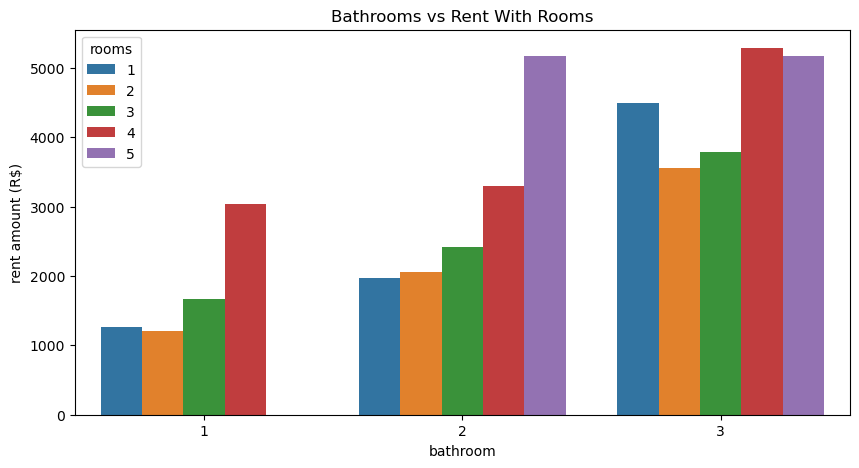

In [57]:
fig,ax=plt.subplots(figsize=(10,5))
sb.barplot(data=r,x=b['bathroom'],y=r['rent amount (R$)'],hue=r['rooms'],ci=False)
plt.title('Bathrooms vs Rent With Rooms')
plt.show()

#
* 1 bathroom with 1 and 2 room are less average rent.
* 1 bathroom with 1 and 2 room are less average rent.
* 3 bathroom with 2 and 3 room are less average rent.

 # CITY VS TOTAL WITH ANIMALS

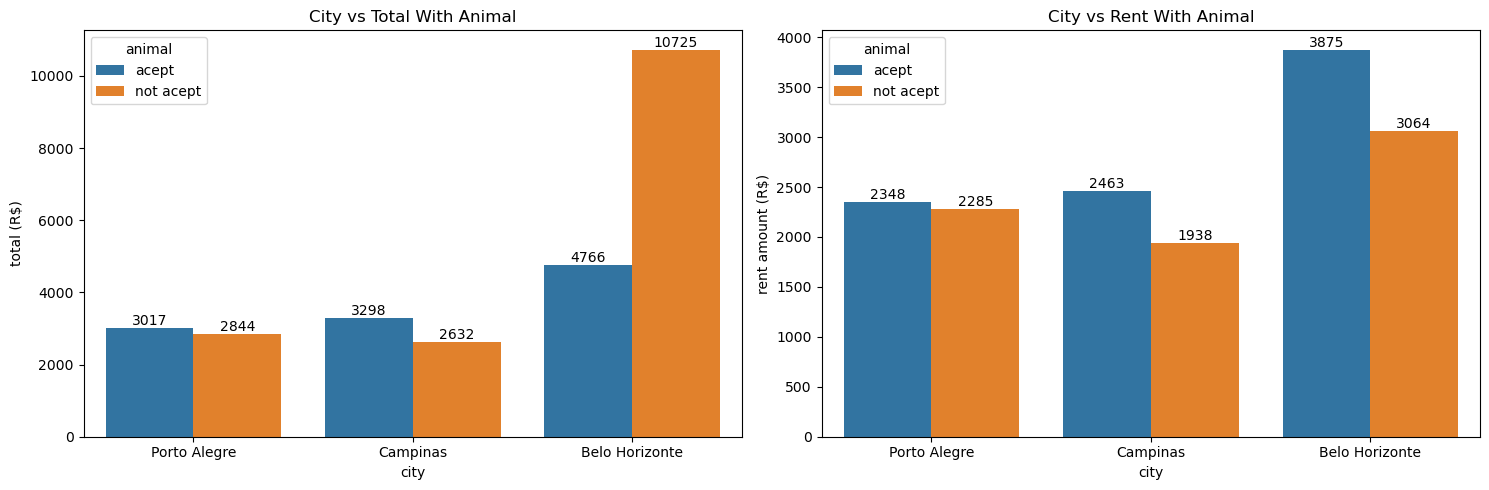

In [58]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sb.barplot(data=work1,x=work1['city'],y=work1['total (R$)'],hue=work1['animal'],ci=False,ax=ax[0])
sb.barplot(data=work1,x=work1['city'],y=work1['rent amount (R$)'],hue=work1['animal'],ci=False,ax=ax[1])
cb(ax[0],work1)
cb(ax[1],work1)
ax[0].set_title('City vs Total With Animal')
ax[1].set_title('City vs Rent With Animal')
plt.tight_layout()
plt.show()

# 
* In the Porto alegre and Campinas not accept the pets are Average Total price less and in Belo Horizonte accept pets houses are less average rent. if you have pets porto alegre best otherwise you dont have pet you will move to campinas.
* In rent not accept pets houses are less rent.

 # CITY VS TOTAL WITH FURNITURE

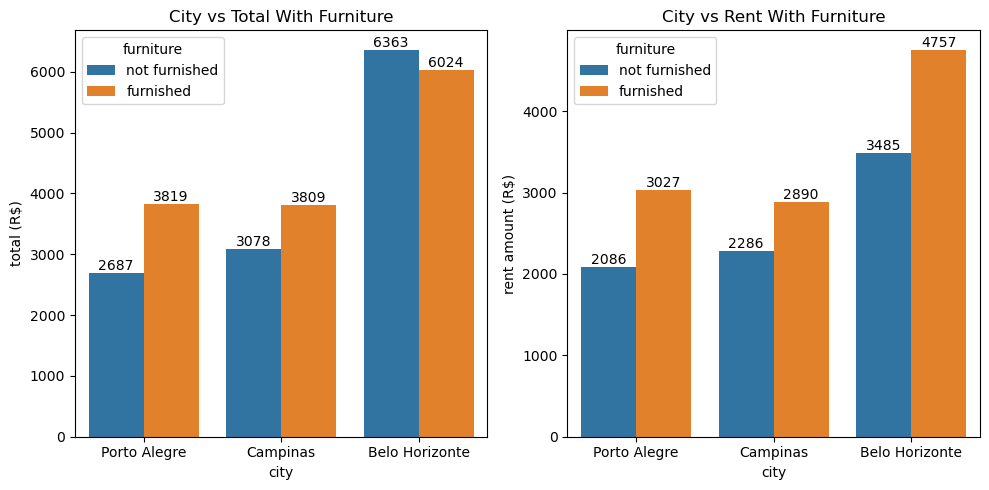

In [59]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.barplot(data=work1,x=work1['city'],y=work1['total (R$)'],hue=work1['furniture'],ci=False,ax=ax[0])
sb.barplot(data=work1,x=work1['city'],y=work1['rent amount (R$)'],hue=work1['furniture'],ci=False,ax=ax[1])
cb(ax[0],work1)
cb(ax[1],work1)
ax[0].set_title('City vs Total With Furniture')
ax[1].set_title('City vs Rent With Furniture')
plt.tight_layout()
plt.show()

#  
* In the Porto alegre and Campinas not furnished houses  are Average Total price less and in Belo Horizonte furnished houses are less average total.
*  In the Porto alegre and Campinas not furnished houses  are Average rent less and in Belo Horizonte furnished houses are less average rent.

 # CITY VS ROOMS WITH FURNITURE

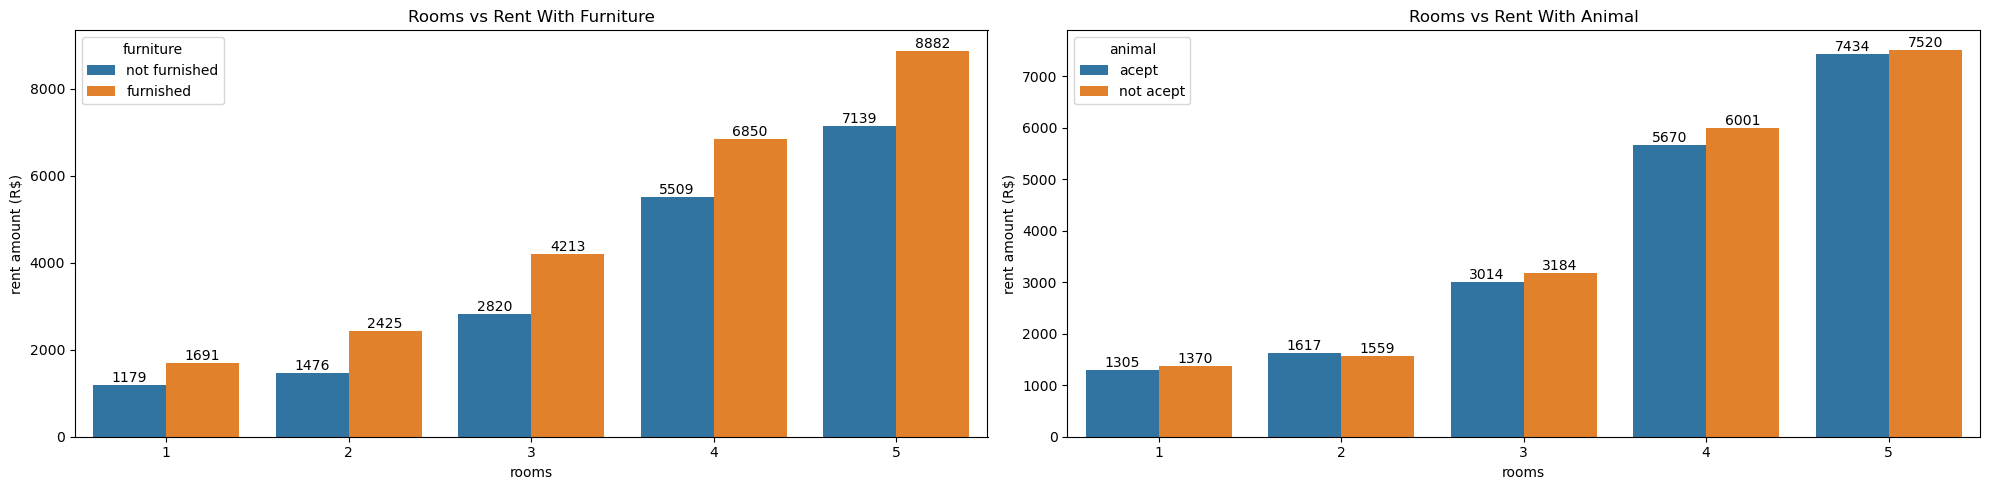

In [60]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
sb.barplot(data=work1,x=r['rooms'],y=r['rent amount (R$)'],hue=r['furniture'],ci=False,ax=ax[0])
sb.barplot(data=work1,x=r['rooms'],y=r['rent amount (R$)'],hue=r['animal'],ci=False,ax=ax[1])
cb(ax[0],work1)
cb(ax[1],work1)
ax[0].set_title('Rooms vs Rent With Furniture')
ax[1].set_title('Rooms vs Rent With Animal')
plt.tight_layout()
plt.show()

#
* If rooms increases rent also increases.
* Animals doesn't affect the rent.

# CITY VS FIRE INSURANCE WITH ANIMAL & FURNISHIED

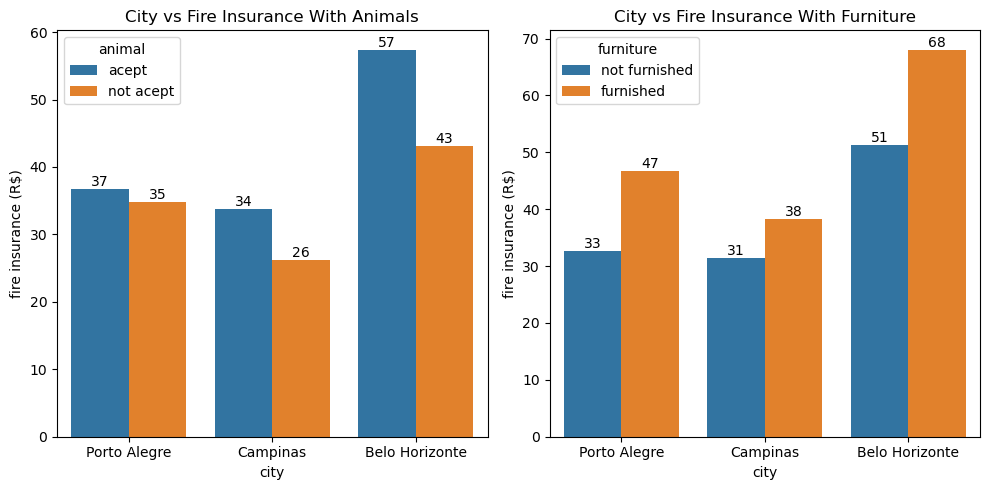

In [61]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.barplot(data=work,x=work1['city'],y=work1['fire insurance (R$)'],hue=work1['animal'],ci=False,ax=ax[0])
sb.barplot(data=work,x=work1['city'],y=work1['fire insurance (R$)'],hue=work1['furniture'],ci=False,ax=ax[1])
cb(ax[0],work1)
cb(ax[1],work1)
ax[0].set_title('City vs Fire Insurance With Animals')
ax[1].set_title('City vs Fire Insurance With Furniture')
plt.tight_layout()
plt.show()

# Animal
* In Porto Alegre ,animal not affect the fire insurange price.But remaining 2 cities if pets accept fire insurance increase.
# Furnished
* In campinas only , furnished affect the fire insurance least.

# RENT AMOUNT VS 
        * ROOMS
        * CITY 
#             WITH FURNITURED

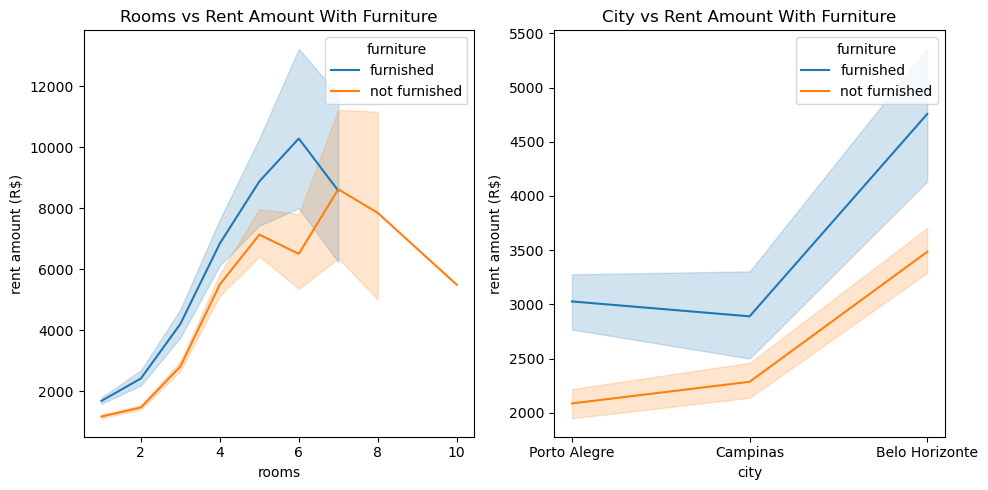

In [62]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.lineplot(x=work1['rooms'],y=work1['rent amount (R$)'],hue=work['furniture'],ax=ax[0])
sb.lineplot(x=work1['city'],y=work1['rent amount (R$)'],hue=work['furniture'],ax=ax[1])
ax[0].set_title('Rooms vs Rent Amount With Furniture')
ax[1].set_title('City vs Rent Amount With Furniture')
plt.tight_layout()
plt.show()

# 
* ROOMS INCREASES RENT AMOUNT ALSO INCREASES. COMPARE TO NOT FURNISHIED , FURNISHED HOUSES ARE RENT HIGH.
* PORTO ALEGRE IS NOT FURNISHIED HOUSE RENT LOW AND IN CAMPINAS FURNISHIED HOUSE ARE RENT LOW.

# PARKING SPACE VS CITY WITH TOTAL AND RENT

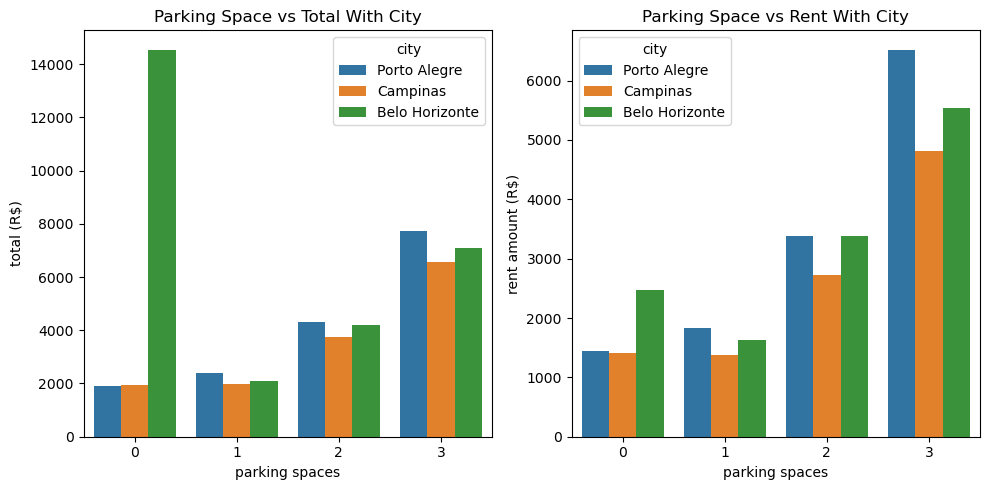

In [63]:
p=work1[work1['parking spaces']<4]
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.barplot(data=p,x=p['parking spaces'],y=p['total (R$)'],hue=p['city'],ci=False,ax=ax[0])
sb.barplot(data=p,x=p['parking spaces'],y=p['rent amount (R$)'],hue=p['city'],ci=False,ax=ax[1])
ax[0].set_title('Parking Space vs Total With City')
ax[1].set_title('Parking Space vs Rent With City')
plt.tight_layout()
plt.show()

# 
* 0 and 1 parking space are total amount is same. So wee take the 1 parking space houses. 2 and 3 parking space houses in campinas is less total.
* 0 and 1 parking space are rent amount is same. So wee take the 1 parking space houses in campinas. 2 and 3 parking space houses in campinas is less total.

# -----------------------------------------------------------------------------------------------------------------

# LEVEL 1---INTERPRETATION
        *Porto Alegre And Belo Horrzontie Have Less Amount Of Rent
        * 1 Rooms Available In Porto Alegre .3 And 4 Rooms Available In Belo Horizonte.
        *1 Bathrooms Available In Porto Alegre And 2 And 3 Available In Belo Horizonte.
        *1 And 2 Parking Space Enough In Porto Algegre. 3 And 4 For Belo Horizonte
        *1 And 2 Floor Enough In Belo Horizonte. 3 And 4 For Porto Algegre
        *Lot Of 1 And 3 Rooms Houses Are Furnished
        *Lot Of 1 Floor Has Been Furnished
        *In Porto Alegre And Belo Horizonte Are Accept The Pets.
        *In Porto Alegre And Belo Horizonte Are Furnished.
        *Less Amount Of Houses With Purnished And Pet Accepted.
        *1 And Bathroom Are Accepted The Pets
        *1 Parking Houses Are Furnished.
        *Lot Of 0 And 1 Floor Houses Are Furnished.
        *If Fire Insurance Increase Rent Also Increase
        *If Hoa Also Increase Total Also Increase.
        *Porto Alegre And Belo Horrzontie Have Less Amount Of Average Rent
        *In Campinas 1,2,3 Rooms Average Total Are Low And In Porto Alegre 4 And 5 Rooms Are Less Average Total.
        *In Campinas 1,2,3 Rooms Average Rents Are Low And In Porto Alegre 4 And 5 Rooms Are Less Average Rents
        *One Bathroom Houses Are Low Total In Campinas And Belo Horizonte.
        * Bathroom Houses Are Less Total In Campinas.
        *Three Bathroom Houses Are Less Total In Campinas.
        *One Bathroom Rent Low In Campinas.
        *Two Bathroom Rent Low In Campinas.
        *Three Bathroom Rent Low In Campinas.
        One Bathroom And 2 Rooms Are Less Average Total.
        *Two Bathroom And 2 Rooms Are Less Average Total.
        *Three Bathroom And 3 Rooms Are Less Average Total.
        *1 Bathroom With 1 And 2 Room Are Less Average Rent.
        *1 Bathroom With 1 And 2 Room Are Less Average Rent.
        *3 Bathroom With 2 And 3 Room Are Less Average Rent.
        *In The Porto Alegre And Campinas Not Accept The Pets Are Average Total Price Less And In Belo Horizonte Accept Pets Houses Are Less Average Rent. If You Have Pets Porto Alegre Best Otherwise You Dont Have Pet You Will Move To Campinas.
        *In Rent Not Accept Pets Houses Are Less Rent.
        *In The Porto Alegre And Campinas Not Furnished Houses Are Average Total Price Less And In Belo Horizonte Furnished Houses Are Less Average Total.
        *In The Porto Alegre And Campinas Not Furnished Houses Are Average Rent Less And In Belo Horizonte Furnished Houses Are Less Average Rent.
        *In Porto Alegre ,Animal Not Affect The Fire Insurange Price.but Remaining 2 Cities If Pets Accept Fire Insurance Increase.
        *If Rooms Increases Rent Also Increases.
        *Animals Doesn't Affect The Rent.
        *In Campinas Only , Furnished Affect The Fire Insurance Least.
        *Rooms Increases Rent Amount Also Increases. Compare To Not Furnishied , Furnished Houses Are Rent High.
        *Porto Alegre Is Not Furnishied House Rent Low And In Campinas Furnishied House Are Rent Low.
        *0 And 1 Parking Space Are Total Amount Is Same. So Wee Take The 1 Parking Space Houses. 2 And 3 Parking Space Houses In Campinas Is Less Total.
        *0 And 1 Parking Space Are Rent Amount Is Same. So Wee Take The 1 Parking Space Houses In Campinas. 2 And 3 Parking Space Houses In Campinas Is Less Total.





    

# LEVEL 2 -- INTERPRETATION

    * For one room - Average total in Campinas is less(1747).
    * For one room - Average rent in Campinas is less(1197).
    * For one room - Average rent with furnished is 1691.
    * For one room - Average rent with not furnished 1179.
    * For one room - Average rent with animal 1305.
    * For one room - Average rent with not animal 1370.



    * For two room - Average total in Campinas is less(1918).
    * For two room - Average rent in Campinas is less(1416).
    * For two room - Average rent with furnished is 2425.
    * For two room - Average rent with not furnished 1476.
    * For two room - Average rent with animal 1617.
    * For two room - Average rent with not animal 1559.


    * For Three room - Average total in Belo Horizonte is less(3560).
    * For Three room - Average rent in Belo Horizonte is less(2857).
    * For Three room - Average rent with furnished is 4213.
    * For Three room - Average rent with not furnished 2820.
    * For Three room - Average rent with animal 3014.
    * For Three room - Average rent with not animal 3184.




# FINAL ---   INTERPRETATION (RECOMMENDATION)
        * BACHELOR --IF  WE CONSIDER FOR BACHELOR ENOUGH ONE ROOM ,ONE PARKING SPACE,ONE BATHROOM 
        * MID-SIZE FAMILY --IF  WE CONSIDER FOR MID-SIZE FAMILY ENOUGH 2  ,ONE OR TWO  PARKING SPACE,ONE OR 2  BATHROOM 
        * LARGE FAMILY-- IF WE CONSIDER THE ABOVE 3 ROOMS AND ABOVE THREE PARKING AND ABOVE 2 BATHROOMS
        
        
        
#  BACHELOR 
        * CAMPINAS  BEST FOR BACHELOR.
                * Average total in Campinas is less(1747).
                * Average rent in Campinas is less(1197).
                * Average rent with furnished is 1691.
                * Average rent with not furnished 1179.
                * Average rent with animal 1305.
                * Average rent with not animal 1370.

                

# MID-SIZE FAMILY 
        * CAMPINAS  BEST FOR MID_SIZE FAMILY.
                * Average total in Campinas is less(1918).
                * Average rent in Campinas is less(1416).
                * Average rent with furnished is 2425.
                * Average rent with not furnished 1476.
                * Average rent with animal 1617.
                * Average rent with not animal 1559.

                
                
# LARGE FAMILY
        * BELO HORIZONTE  BEST FOR LARGE FAMILY.ROOMS INCREASE RENT ALSO INCREASE.
                * Average total in Belo Horizonte is less(3560).
                * Average rent in Belo Horizonte is less(2857).
                * Average rent with furnished is 4213.
                * Average rent with not furnished 2820.
                * Average rent with animal 3014.
                * Average rent with not animal 3184.

                